In [1]:
# Using Jupyter Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
df_xl = pd.read_excel("Data_Detective_Challenge_Dataset.xls")
df_xl.to_csv('df.csv', index=False)
df = pd.read_csv("df.csv",encoding='unicode_escape')
df.head()

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  2012-07-31  2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878  2013-02-05  2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249  2013-10-17  2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342  2013-01-28  2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320  2013-11-05  2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories   
1   FUR-CH-10003950   Furniture       Chairs   
2   TEC-PH-10004664  Technology       Phones   
3   TEC-PH-10004583  Technology       Phones   
4  TEC-SHA-10000501  Technology      Copiers   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   
2                  Nokia Smart Phone, with Caller ID  5175.171        9   
3                     Motorola Smart Phone, Cordless  2892.510        5   
4                     Sharp Wireless Fax, High-Speed  2832.960        8   

  Discount    Profit  Shipping Cost  Order Priority  
0      0.0  762.1845         933.57        Critical  
1      0.1 -288.7650         923.63        Critical  
2      0.1  919.9710         915.49          Medium  
3      0.1  -96.5400         910.16          Medium  
4      0.0  311.5200         903.04        Critical  

[5 rows x 24 columns]

In [3]:
df_copy_1 = df.copy()
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
# checking for duplicates
df_copy_1[df_copy_1.duplicated()]

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, City, State, Country, Postal Code, Market, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority]
Index: []

[0 rows x 24 columns]

In [5]:
#Getting column names
column_names = df_copy_1.columns
column_names

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
# dividing columns into identity columns (mostly useless), numerical columns and classification columns.
col_iden = ['Row ID', 'Order ID', 'Order Date', 'Ship Date','Customer ID', 'Customer Name','Postal Code','Product ID',]
col_num = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
col_class = ['Ship Mode','Segment', 'City', 'State', 'Country','Market', 'Region','Category','Sub-Category', 'Product Name','Order Priority']
col_class_small = ['Ship Mode','Segment','Market', 'Region','Category','Sub-Category'] #added sub category also
col_class_big = ['City', 'State', 'Country','Product Name']  # category of columns with large number of variables


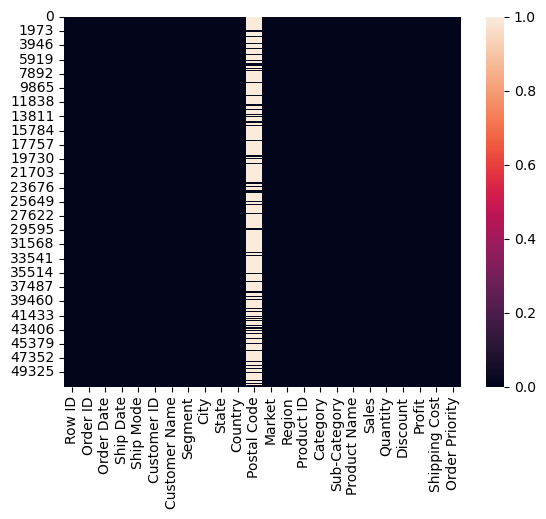

In [7]:
sns.heatmap(df_copy_1.isnull())
df_copy_2 = df_copy_1.copy();

In [8]:
df_copy_2.drop((col_iden), axis=1, inplace=True)
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   City            51290 non-null  object 
 3   State           51290 non-null  object 
 4   Country         51290 non-null  object 
 5   Market          51290 non-null  object 
 6   Region          51290 non-null  object 
 7   Category        51290 non-null  object 
 8   Sub-Category    51290 non-null  object 
 9   Product Name    51290 non-null  object 
 10  Sales           51290 non-null  float64
 11  Quantity        51290 non-null  int64  
 12  Discount        51290 non-null  float64
 13  Profit          51290 non-null  float64
 14  Shipping Cost   51290 non-null  float64
 15  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 6.3+ MB


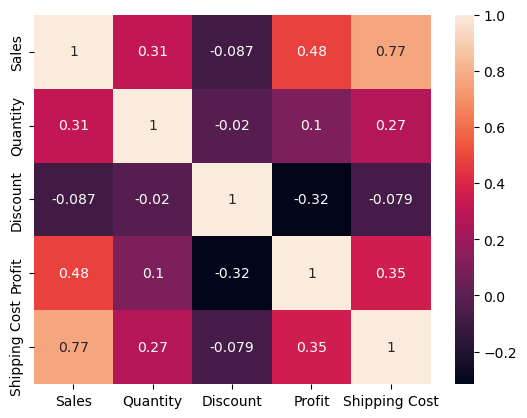

In [9]:
# correlation matrix
corr_matrix = df_copy_2[(col_num)].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

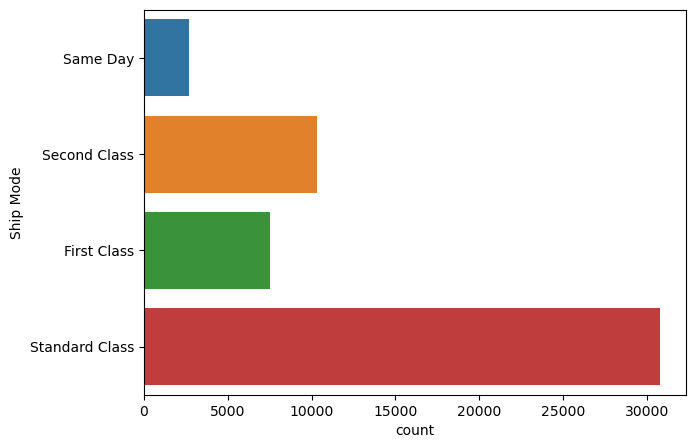

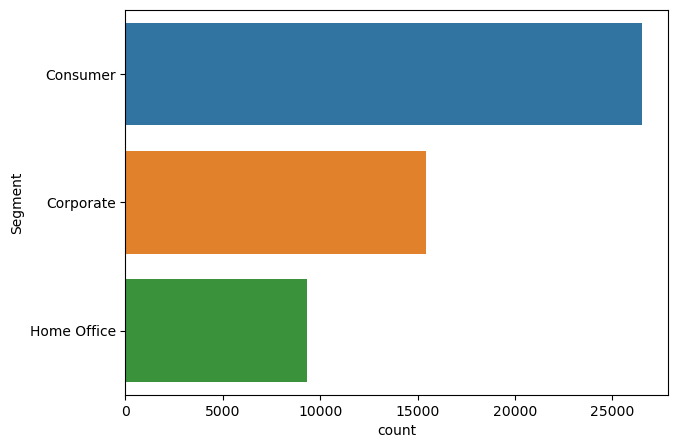

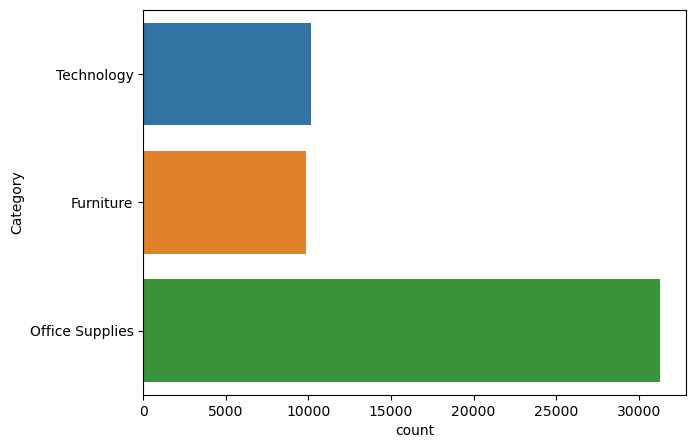

In [10]:
#Sales Count
for i in range(len(col_class_small)-1):
  plt.figure(figsize=(7,5))
  sns.countplot(y= col_class_small[i], data = df_copy_2);
plt.show()

In [11]:
#Sales Count of each Sub-Category
plt.figure(figsize=(7,5))
df_grouped = df.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')
sub_category_order = df.groupby('Category')['Sub-Category'].unique().apply(list).reset_index()
sns.barplot(data=df_grouped, x='Count', y='Sub-Category', hue='Category', order=sub_category_order['Sub-Category'].explode())

<Axes: xlabel='Count', ylabel='Sub-Category'>

Text(0.5, 0, 'Count')

<Figure size 700x500 with 0 Axes>

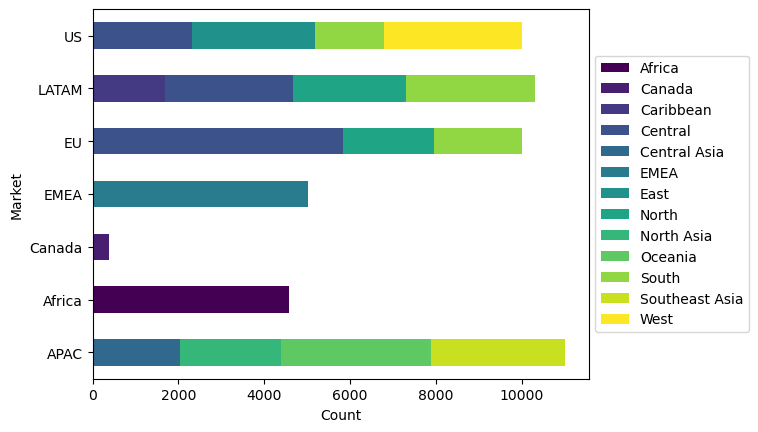

In [12]:
# Contribution of different regions in total sales count
df_grouped = df_copy_2.groupby(['Market', 'Region']).size().reset_index(name='Count')
df_grouped
pivot_df = df_grouped.pivot(index='Market', columns='Region', values='Count').fillna(0)
plt.figure(figsize=(7, 5))
pivot_df.plot(kind='barh', stacked=True, colormap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Count')


In [13]:
# Contribution of different Sub Categories in Categories sales count
df_grouped2 = df_copy_2.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')
pivot_df2 = df_grouped2.pivot(index='Category', columns='Sub-Category', values='Count').fillna(0)
plt.figure(figsize=(7, 5))
pivot_df2.plot(kind='barh', stacked=True, colormap='tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Count')


Text(0.5, 0, 'Count')

<Figure size 700x500 with 0 Axes>

In [14]:
# How many differet products in each category, sub category
df_grouped3 = df_copy_2.groupby(['Category','Sub-Category'])['Product Name'].nunique().reset_index()
sns.barplot(data=df_grouped3,y='Sub-Category',x='Product Name',hue='Category')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Different Products listed under each Sub-Category')


Text(0.5, 0, 'Number of Different Products listed under each Sub-Category')

In [15]:
#Order Priority Anlysis
df_copy_2['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

<Figure size 700x500 with 0 Axes>

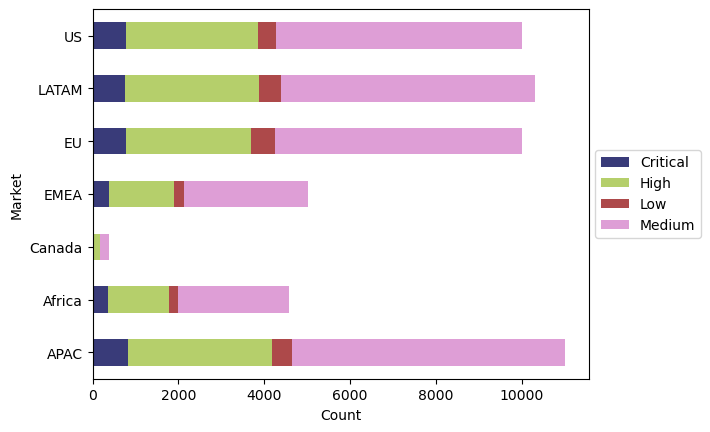

<Figure size 700x500 with 0 Axes>

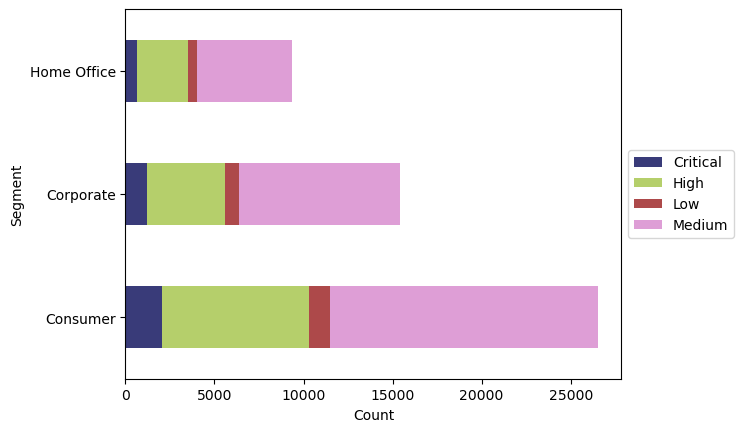

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

In [16]:
col_count_plot=['Market','Segment','Category','Sub-Category']
for i in range(len(col_count_plot)):
  df_grouped_new = df_copy_2.groupby([col_count_plot[i], 'Order Priority']).size().reset_index(name='Count')
  pivot_df_new = df_grouped_new.pivot(index=col_count_plot[i], columns='Order Priority', values='Count').fillna(0)
  plt.figure(figsize=(7, 5))
  pivot_df_new.plot(kind='barh', stacked=True, colormap='tab20b')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xlabel('Count')
plt.show()

In [17]:
#Ship Mode Anlysis
df_copy_2['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

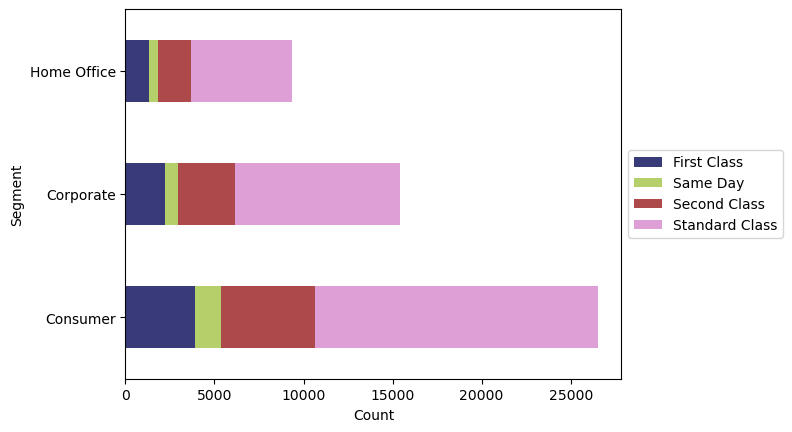

<Figure size 700x500 with 0 Axes>

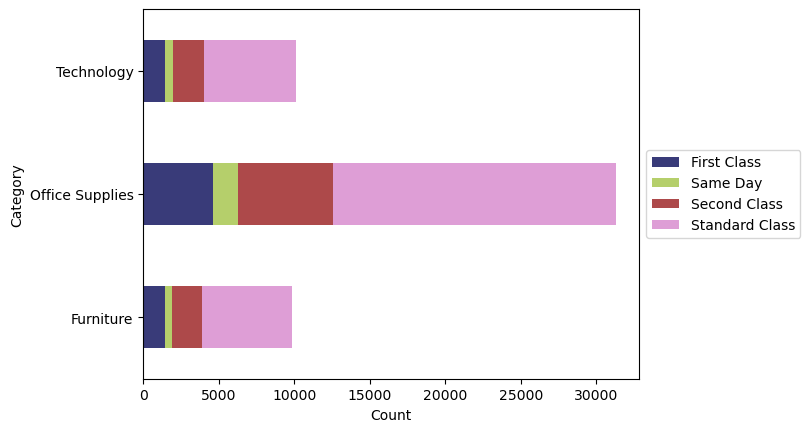

<Figure size 700x500 with 0 Axes>

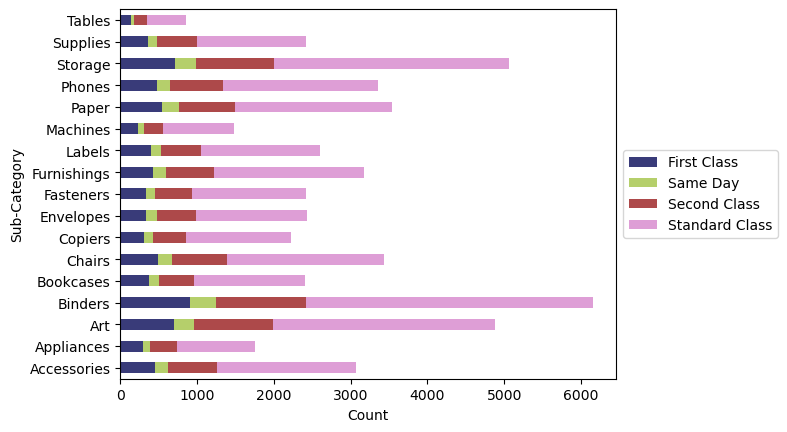

In [18]:
col_count_plot=['Market','Segment','Category','Sub-Category']
for i in range(len(col_count_plot)):
  df_grouped_new = df_copy_2.groupby([col_count_plot[i], 'Ship Mode']).size().reset_index(name='Count')
  pivot_df_new = df_grouped_new.pivot(index=col_count_plot[i], columns='Ship Mode', values='Count').fillna(0)
  plt.figure(figsize=(7, 5))
  pivot_df_new.plot(kind='barh', stacked=True, colormap='tab20b')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xlabel('Count')
plt.show()

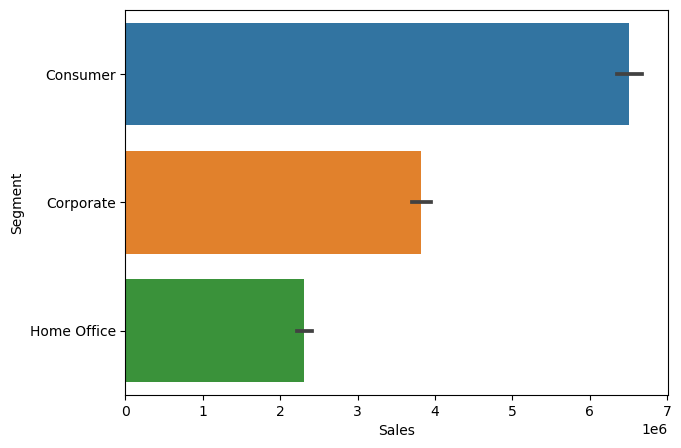

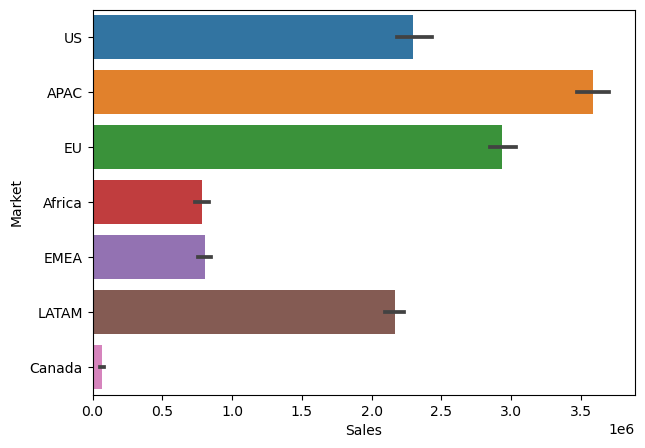

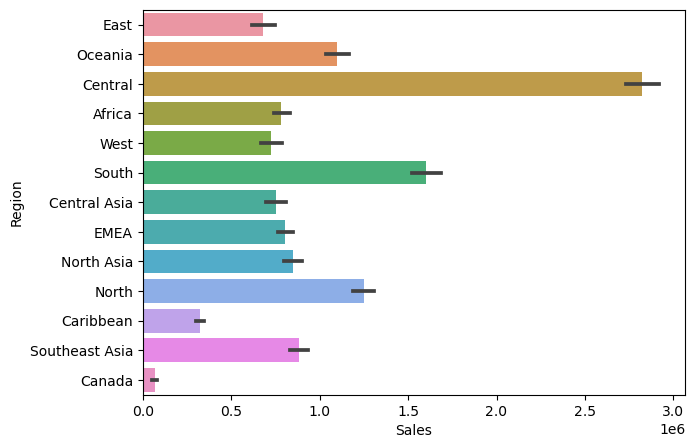

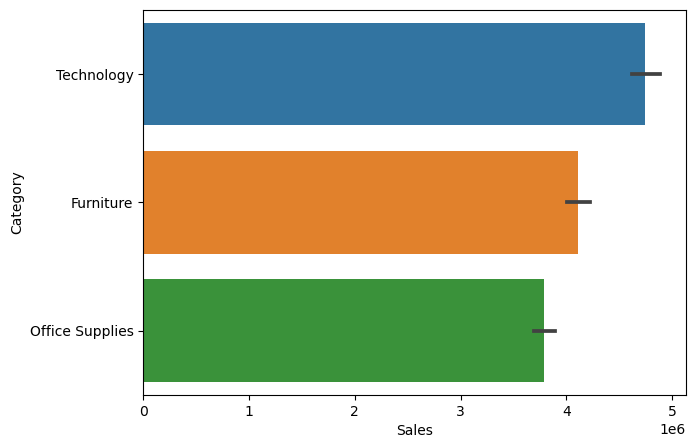

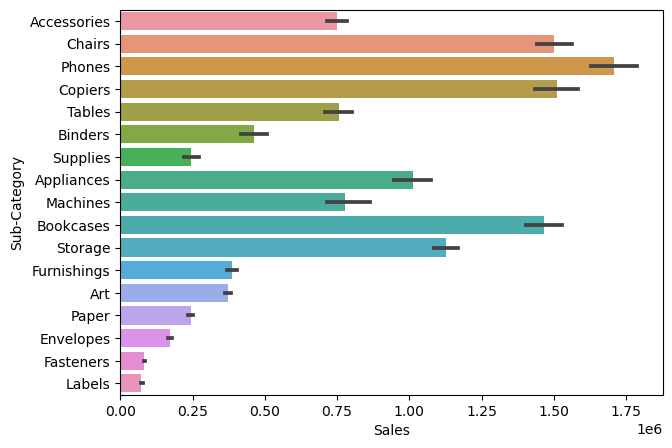

In [19]:
# Total Sales
for i in range(len(col_class_small)):
  plt.figure(figsize=(7,5))
  sns.barplot(y= col_class_small[i],x='Sales', data = df_copy_2, estimator="sum");
plt.show()

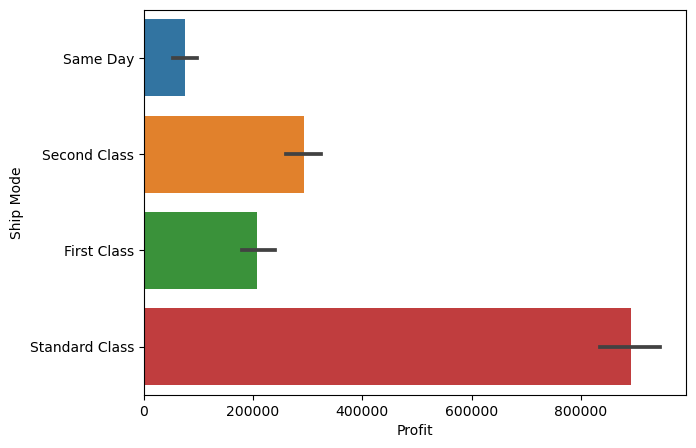

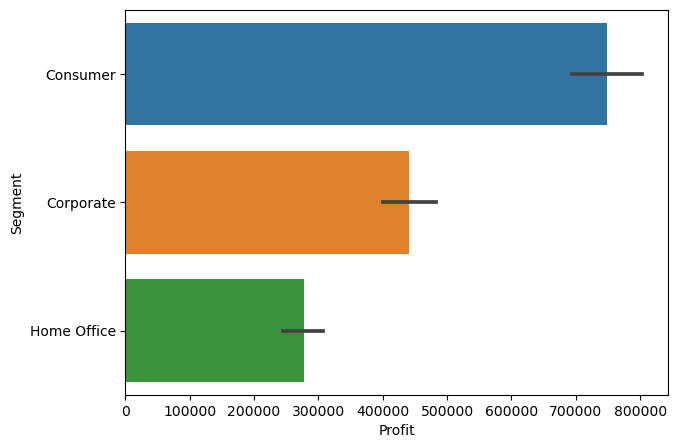

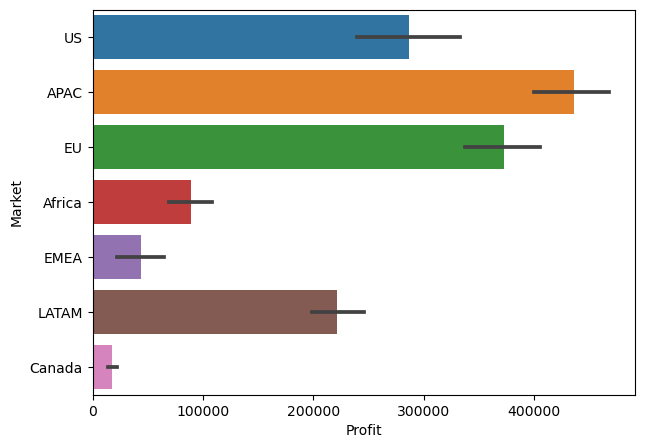

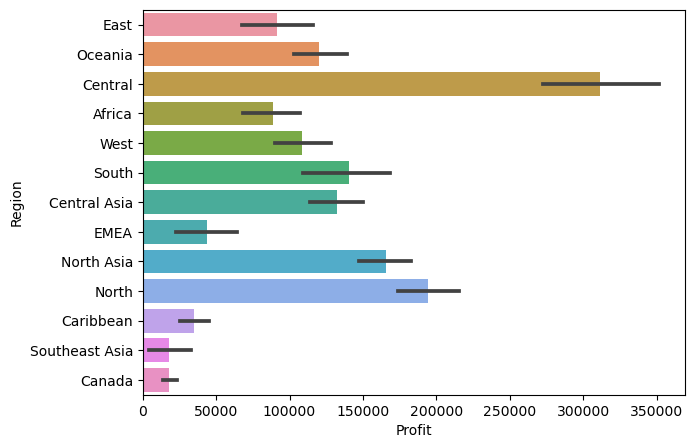

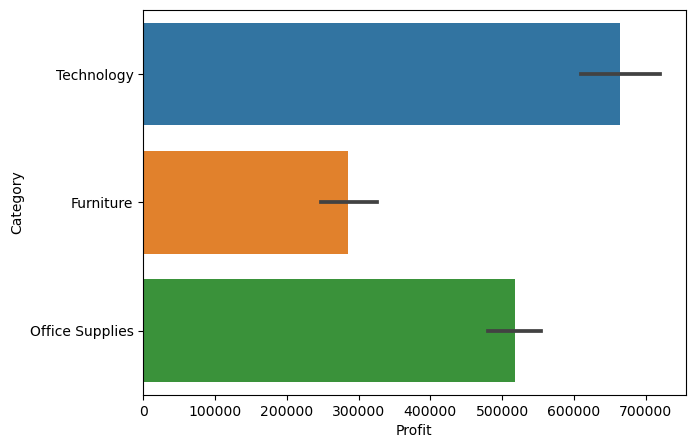

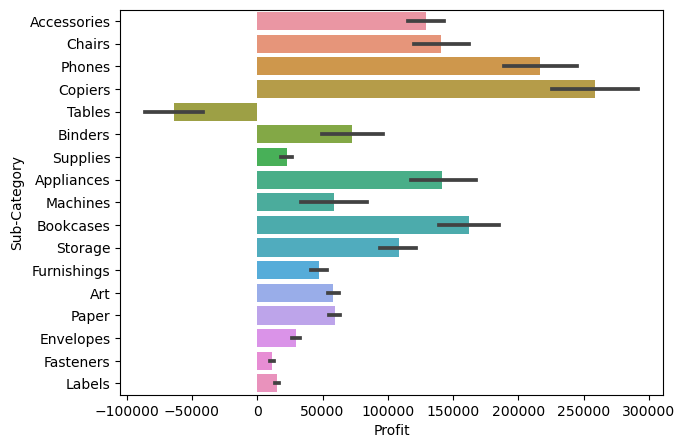

In [20]:
# Sum of Profit
for i in range(len(col_class_small)):
  plt.figure(figsize=(7,5))
  sns.barplot(y= col_class_small[i],x='Profit', data = df_copy_2, estimator="sum");
plt.show()

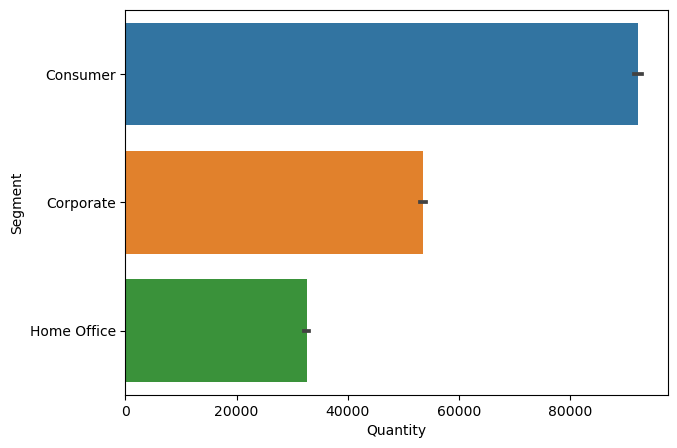

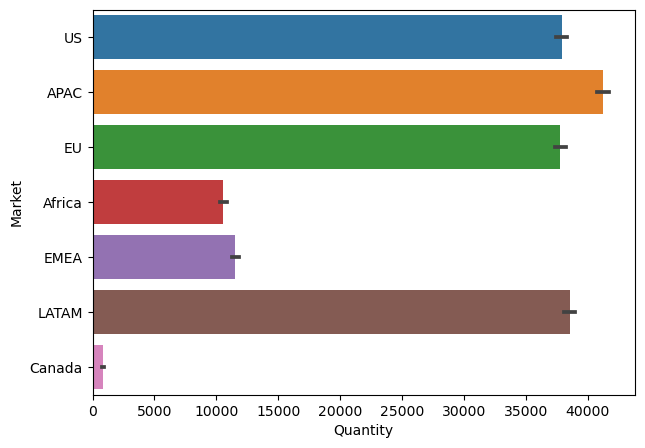

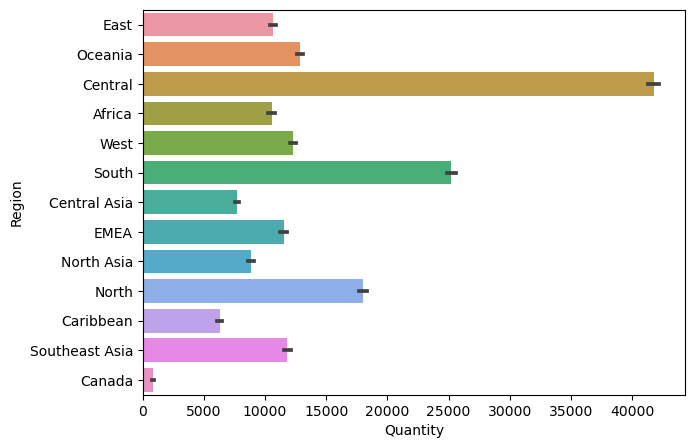

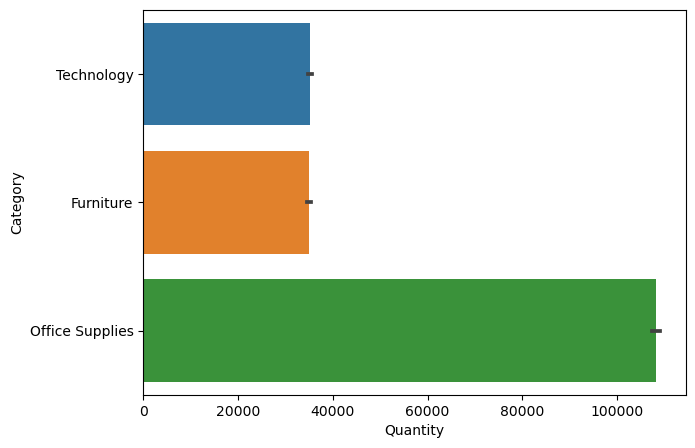

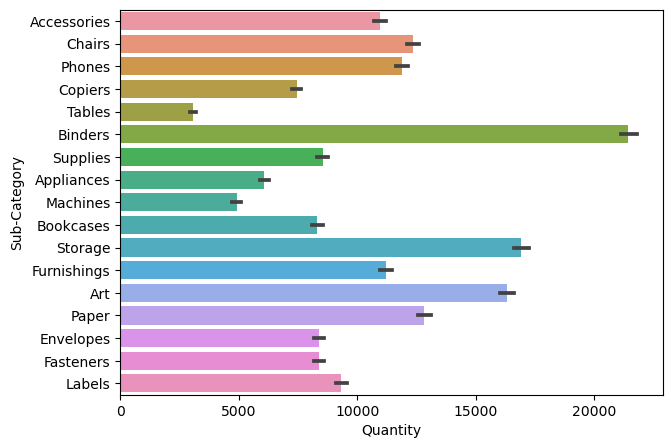

In [21]:
# Total Quantity Sold
for i in range(len(col_class_small)):
  plt.figure(figsize=(7,5))
  sns.barplot(y= col_class_small[i],x='Quantity', data = df_copy_2, estimator="sum");
plt.show()

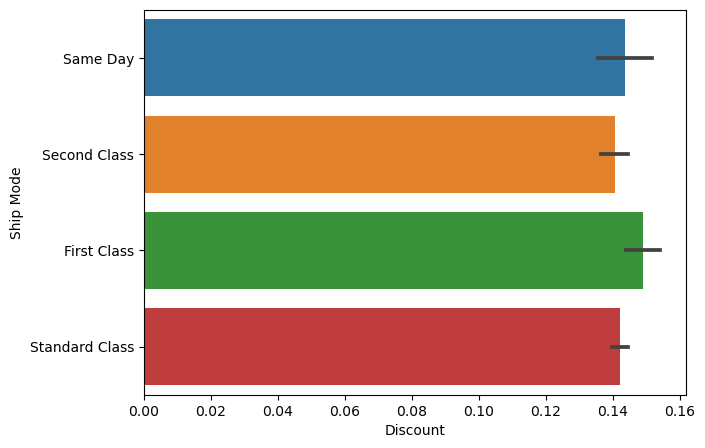

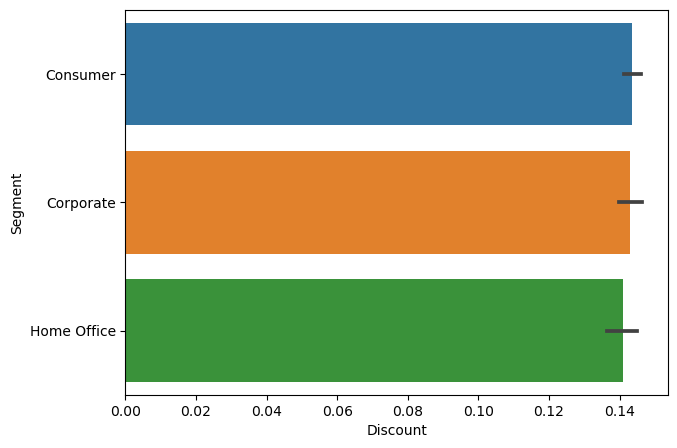

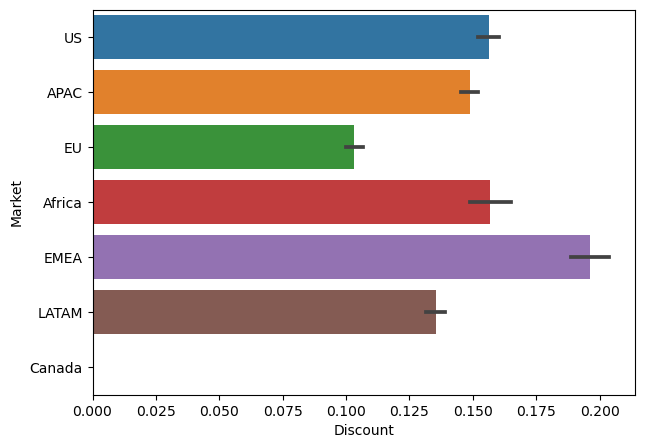

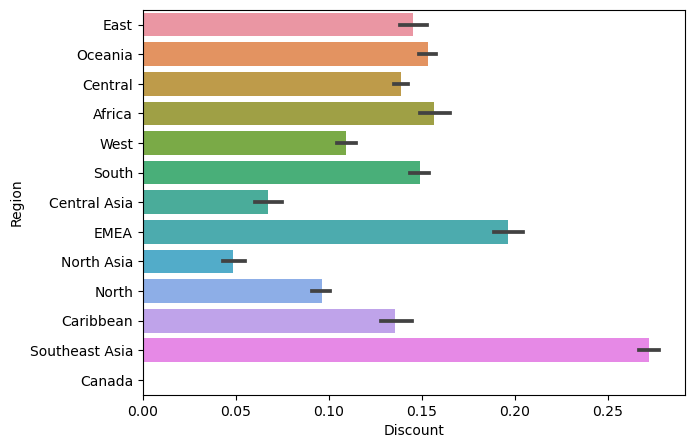

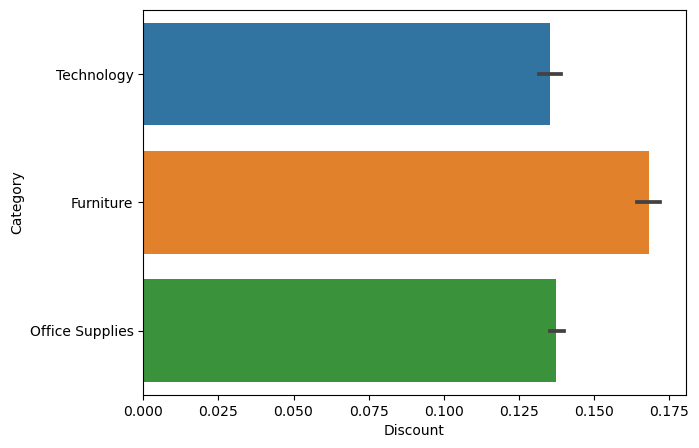

In [22]:
# Mean of Discounts
for i in range(len(col_class_small)):
  plt.figure(figsize=(7,5))
  sns.barplot(y= col_class_small[i],x='Discount', data = df_copy_2, estimator="mean");
plt.show()

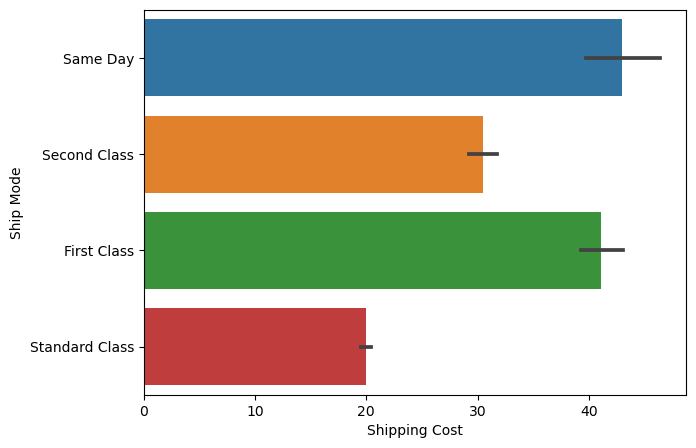

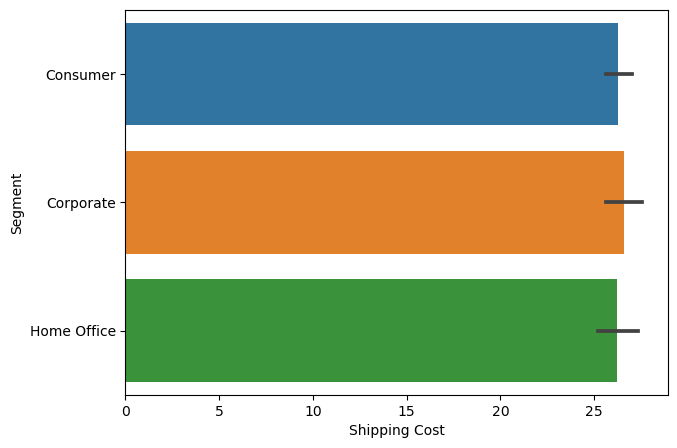

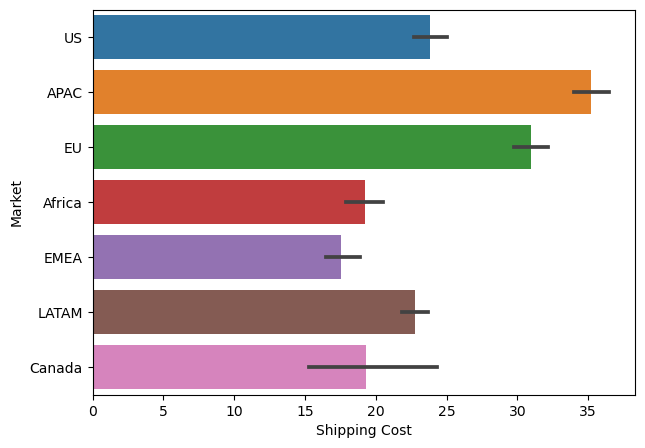

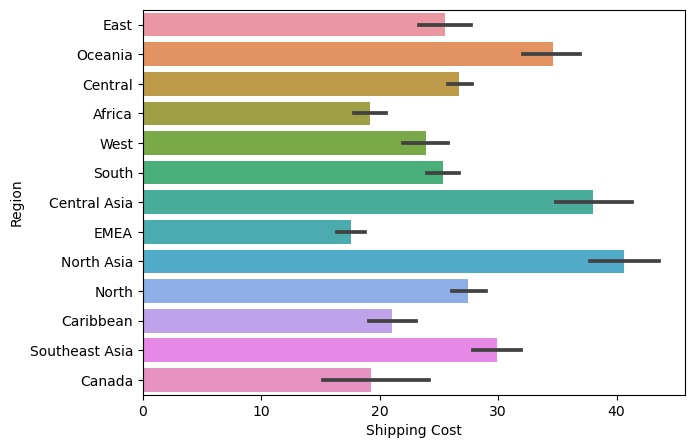

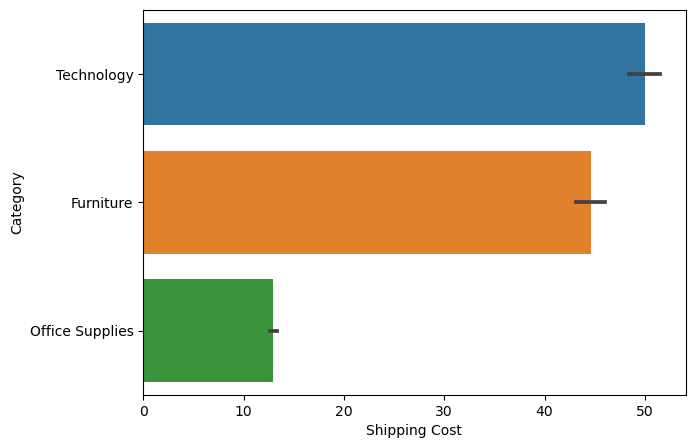

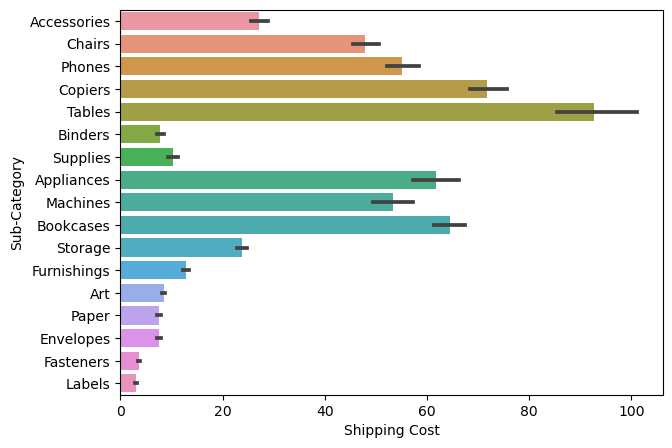

In [23]:
# Mean of Shipping Costs
for i in range(len(col_class_small)):
  plt.figure(figsize=(7,5))
  sns.barplot(y= col_class_small[i],x='Shipping Cost', data = df_copy_2, estimator="mean");
plt.show()

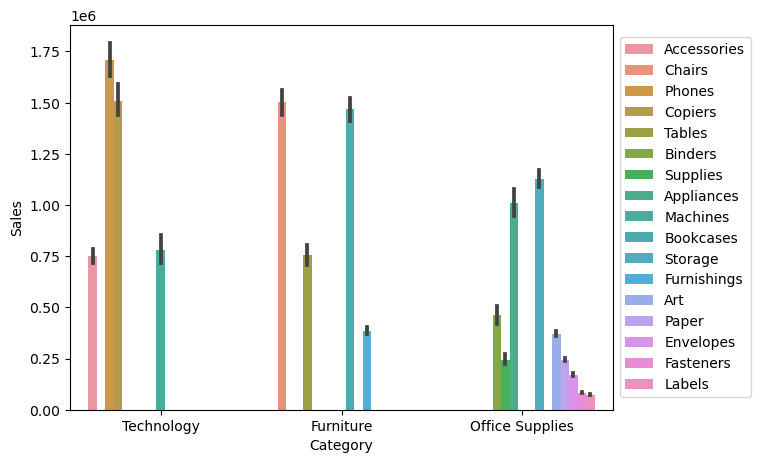

In [24]:
#Total Sales for each subcategory in a category
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy_2,x='Category',hue='Sub-Category',y='Sales',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
df_copy_2['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [26]:
df_copy_2['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [27]:
df_copy_2[col_class_big].value_counts()

City                     State       Country        Product Name                               
New York City            New York    United States  Staples                                        23
Los Angeles              California  United States  Staples                                        16
Houston                  Texas       United States  Staples                                        12
San Francisco            California  United States  Staples                                        12
Chicago                  Illinois    United States  Staples                                         8
                                                                                                   ..
Hayange                  Lorraine    France         Cameo Clasp Envelope, Set of 50                 1
                                                    Fiskars Shears, Easy Grip                       1
                                                    Harbour Creations Rocking Chair, Adj

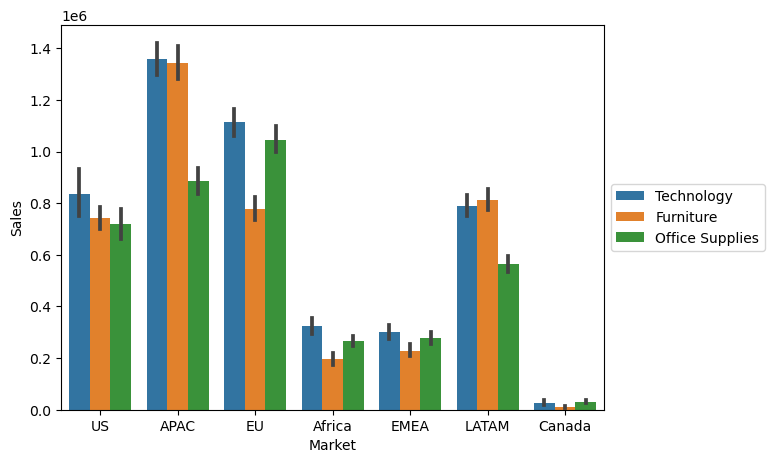

In [28]:
#Total Sales for each category in a Market
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy_2,x='Market',hue='Category',y='Sales',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

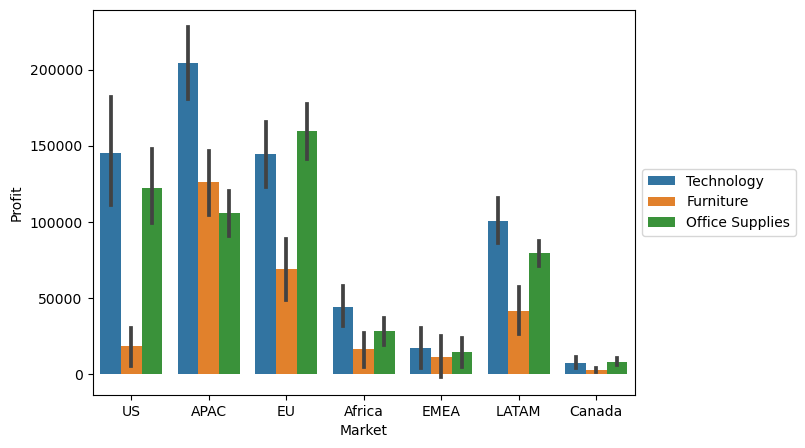

In [29]:
#Total Profit for each category in a Market
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy_2,x='Market',hue='Category',y='Profit',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

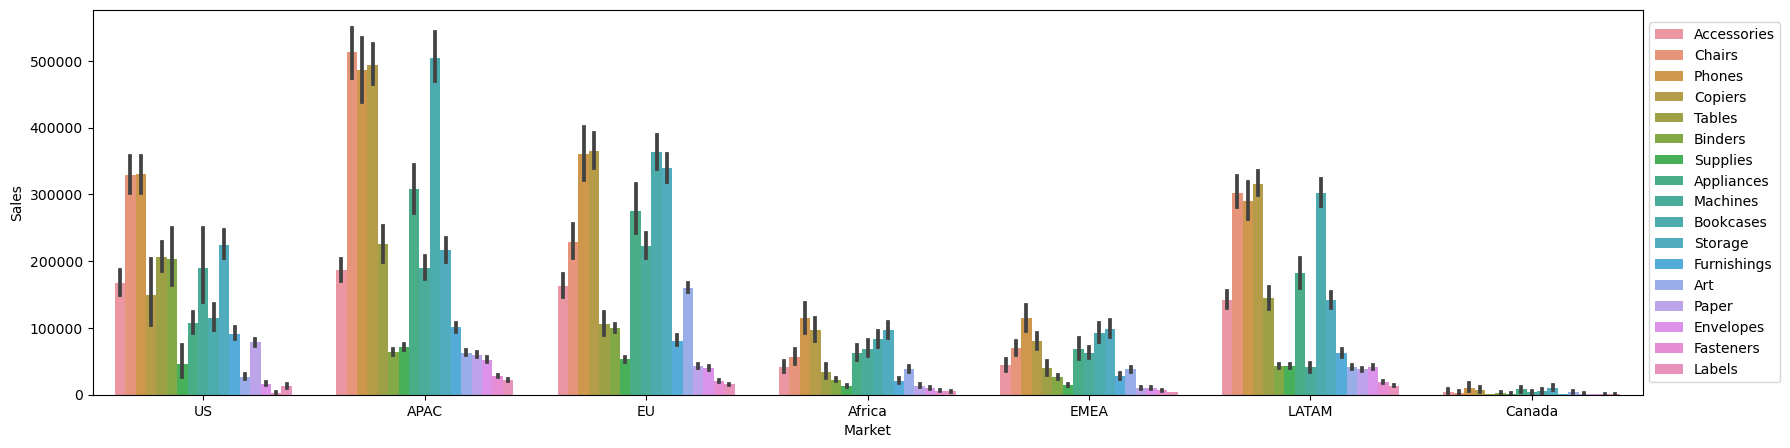

In [30]:
#Total Sales for each Sub-category in Different Markets
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_2,x='Market',hue='Sub-Category',y='Sales',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

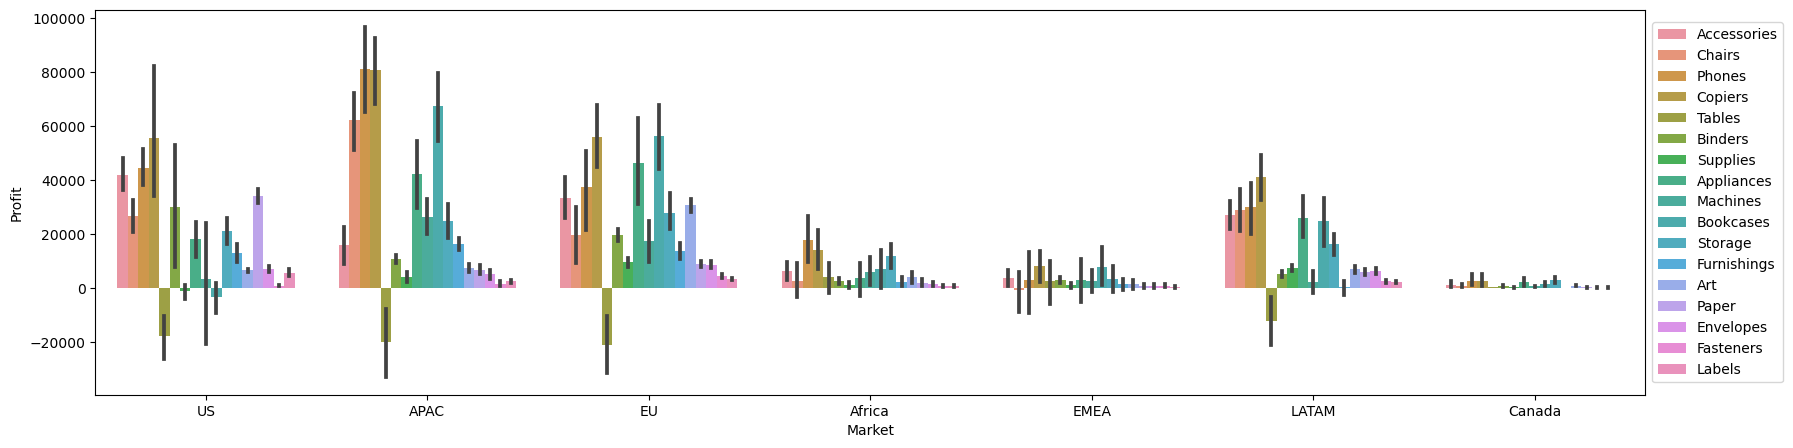

In [31]:
#Total Profit for each Sub-category in Different Markets
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_2,x='Market',hue='Sub-Category',y='Profit',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [32]:
df_copy_2['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

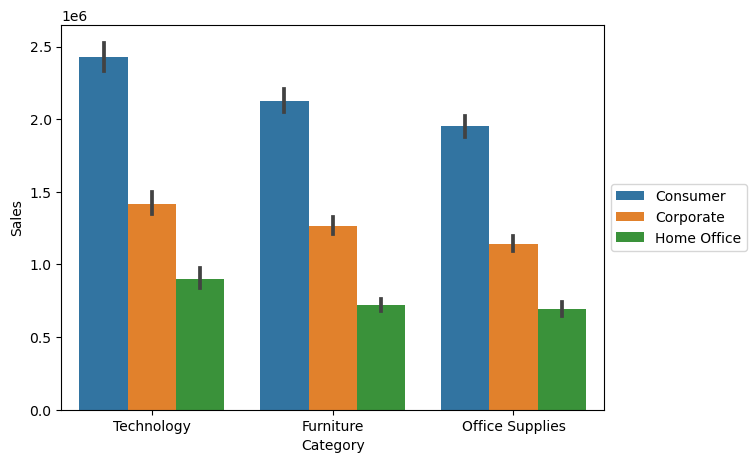

In [33]:
#Total Sales of each category divided into segments
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy_2,x='Category',hue='Segment',y='Sales',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

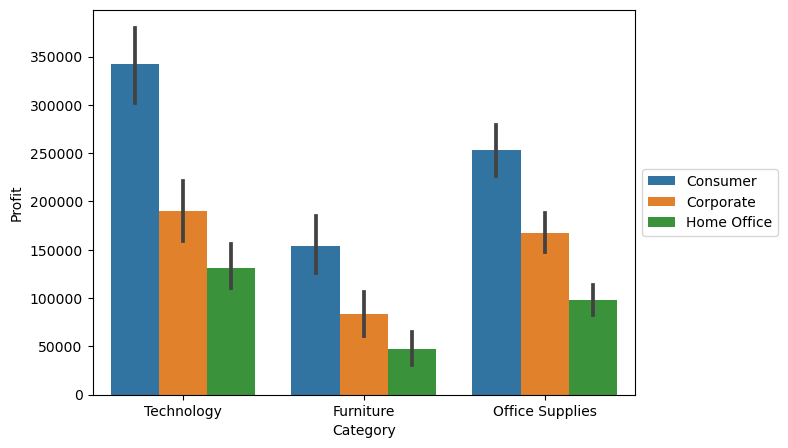

In [34]:
#Total Profit of each category divided into segments
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy_2,x='Category',hue='Segment',y='Profit',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [35]:
#In each sub-category selling to which segment is most profitable
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_2,x='Sub-Category',hue='Segment',y='Profit',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

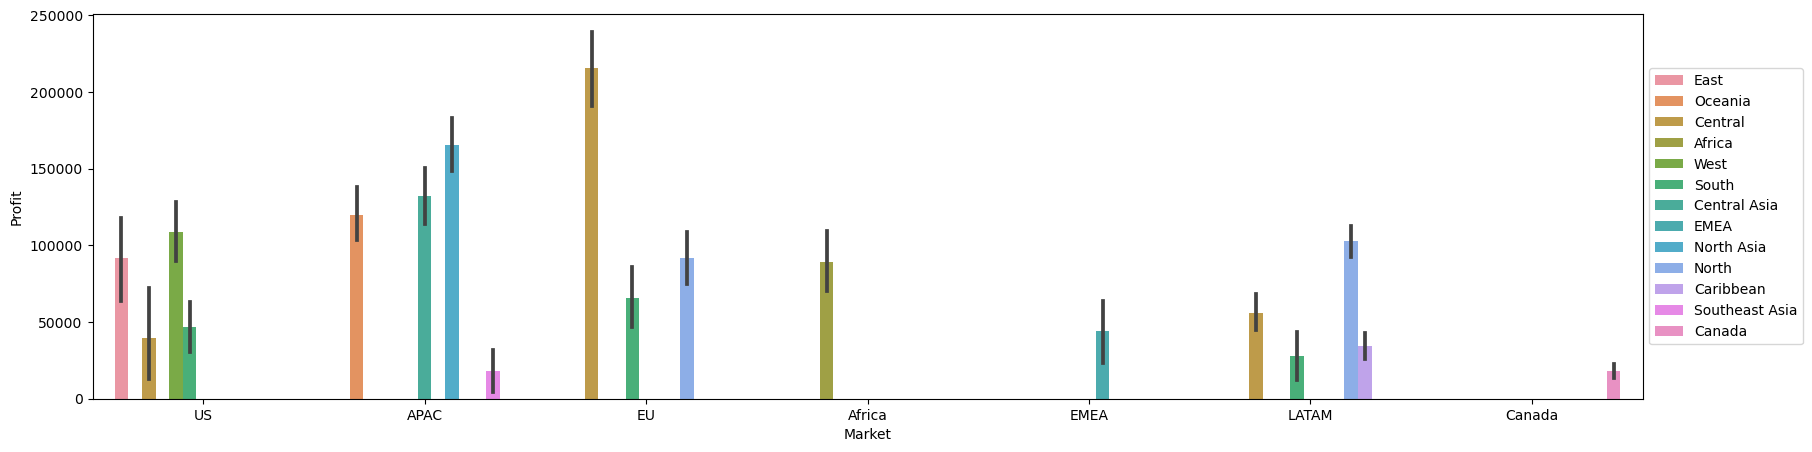

In [36]:
#To get insight about the regions listed for each market
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_2,x='Market',hue='Region',y='Profit',estimator='sum')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Adding Financial Ratios

In [37]:
df_copy_3 = df_copy_2.copy()
# creating a new column Gross Profit Margin (Profit/Sales) (GPR)
df_copy_3['GPR'] = np.where(df_copy_3['Sales'] != 0, df_copy_3['Profit'] / df_copy_3['Sales'], 0)
# creating a new column Net Profit Margin ((Sales - discount)/Sales) (NPR)
df_copy_3['NPR'] = np.where(df_copy_3['Sales'] != 0, (df_copy_3['Sales']-df_copy_3['Sales']*df_copy_3['Discount'])/ df_copy_3['Sales'], 0)
# profit per quantity (PPQ)
df_copy_3['PPQ'] = np.where(df_copy_3['Quantity'] != 0, df_copy_3['Profit'] / df_copy_3['Quantity'], 0)
# shipping cost ratio (SCR)
df_copy_3['SCR'] = np.where(df_copy_3['Sales'] != 0, df_copy_3['Shipping Cost'] / df_copy_3['Sales'], 0)
# array of all indicators
ind = ['GPR','NPR','PPQ','SCR'];
df_copy_3

Ship Mode      Segment           City            State  \
0            Same Day     Consumer  New York City         New York   
1        Second Class    Corporate     Wollongong  New South Wales   
2         First Class     Consumer       Brisbane       Queensland   
3         First Class  Home Office         Berlin           Berlin   
4            Same Day     Consumer          Dakar            Dakar   
...               ...          ...            ...              ...   
51285        Same Day    Corporate           Kure        Hiroshima   
51286  Standard Class     Consumer        Houston            Texas   
51287        Same Day  Home Office         Oxnard       California   
51288  Standard Class  Home Office       Valinhos       SÃ£o Paulo   
51289    Second Class     Consumer       Tipitapa          Managua   

             Country  Market      Region         Category Sub-Category  \
0      United States      US        East       Technology  Accessories   
1          Australia    APAC     Oceania        Furniture       Chairs   
2          Australia    APAC     Oceania       Technology       Phones   
3            Germany      EU     Central       Technology       Phones   
4            Senegal  Africa      Africa       Technology      Copiers   
...              ...     ...         ...              ...          ...   
51285          Japan    APAC  North Asia  Office Supplies    Fasteners   
51286  United States      US     Central  Office Supplies   Appliances   
51287  United States      US        West  Office Supplies    Envelopes   
51288         Brazil   LATAM       South  Office Supplies      Binders   
51289      Nicaragua   LATAM     Central  Office Supplies        Paper   

                                            Product Name     Sales  Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1              Novimex Executive Leather Armchair, Black  3709.395         9   
2                      Nokia Smart Phone, with Caller ID  5175.171         9   
3                         Motorola Smart Phone, Cordless  2892.510         5   
4                         Sharp Wireless Fax, High-Speed  2832.960         8   
...                                                  ...       ...       ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100         5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444         1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920         3   
51288                            Acco Index Tab, Economy    13.440         2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380         3   

       Discount    Profit  Shipping Cost Order Priority       GPR  NPR  \
0           0.0  762.1845        933.570       Critical  0.330000  1.0   
1           0.1 -288.7650        923.630       Critical -0.077847  0.9   
2           0.1  919.9710        915.490         Medium  0.177766  0.9   
3           0.1  -96.5400        910.160         Medium -0.033376  0.9   
4           0.0  311.5200        903.040       Critical  0.109963  1.0   
...         ...       ...            ...            ...       ...  ...   
51285       0.0    4.5000          0.010         Medium  0.069124  1.0   
51286       0.8   -1.1100          0.010         Medium -2.500000  0.2   
51287       0.0   11.2308          0.010           High  0.490000  1.0   
51288       0.0    2.4000          0.003         Medium  0.178571  1.0   
51289       0.0    1.8000          0.002           High  0.029326  1.0   

            PPQ       SCR  
0      108.8835  0.404204  
1      -32.0850  0.248997  
2      102.2190  0.176900  
3      -19.3080  0.314661  
4       38.9400  0.318762  
...         ...       ...  
51285    0.9000  0.000154  
51286   -1.1100  0.022523  
51287    3.7436  0.000436  
51288    1.2000  0.000223  
51289    0.6000  0.000033  

[51290 rows x 20 columns]

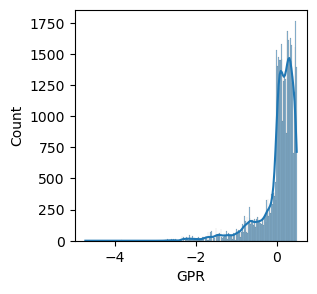

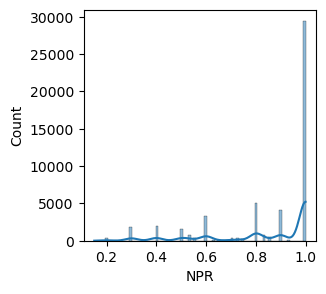

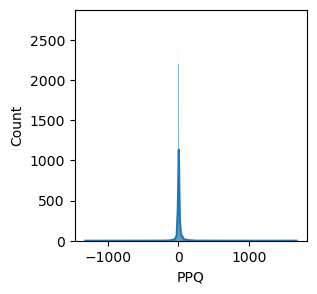

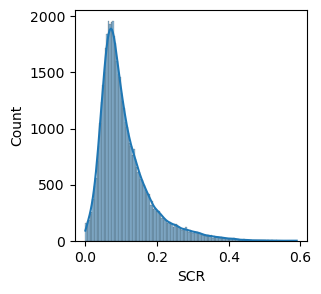

In [38]:
for i in range(len(ind)):
  plt.figure(figsize=(3,3))
  sns.histplot(x= ind[i], data = df_copy_3, kde=True);
plt.show()

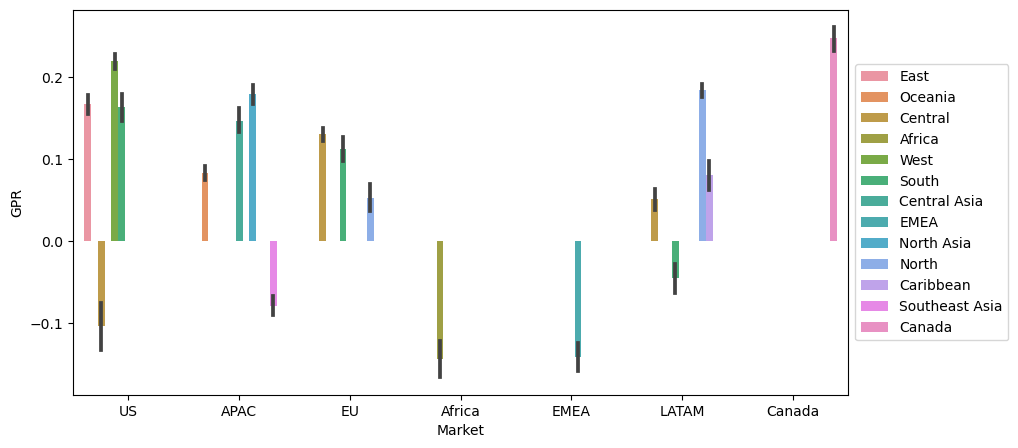

In [39]:
#To get insight about the GPR in regions listed for each market (estimator = mean)
plt.figure(figsize=(10,5))
sns.barplot(data=df_copy_3,x='Market',hue='Region',y='GPR',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

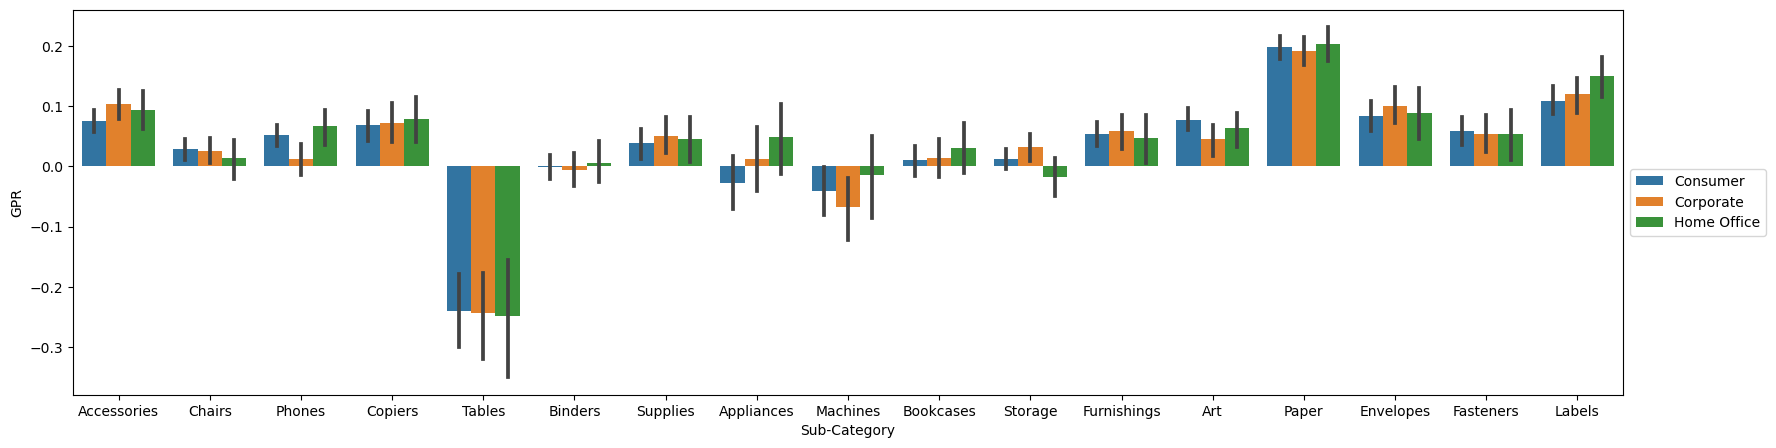

In [40]:
#In each sub-category selling to which segment has most GPR
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Sub-Category',hue='Segment',y='GPR',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [41]:
#In each sub-category selling to which segment has most PPQ
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Sub-Category',hue='Segment',y='PPQ',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

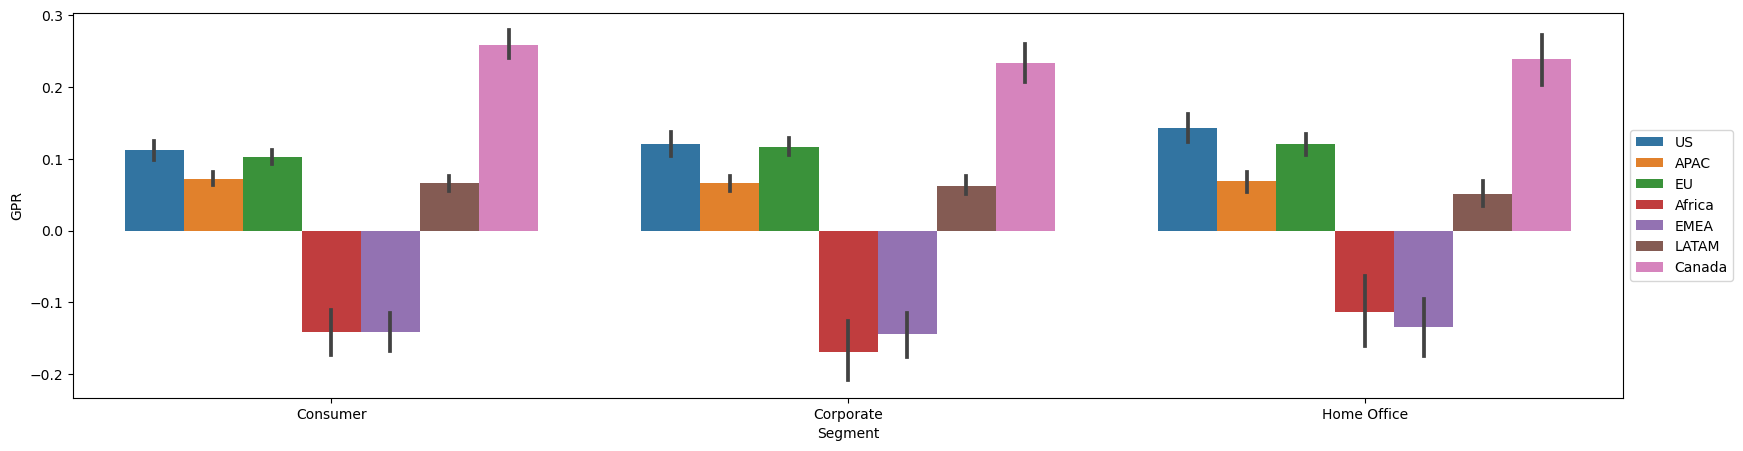

In [42]:
#In each segment selling in which market has most GPR
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Segment',hue='Market',y='GPR',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

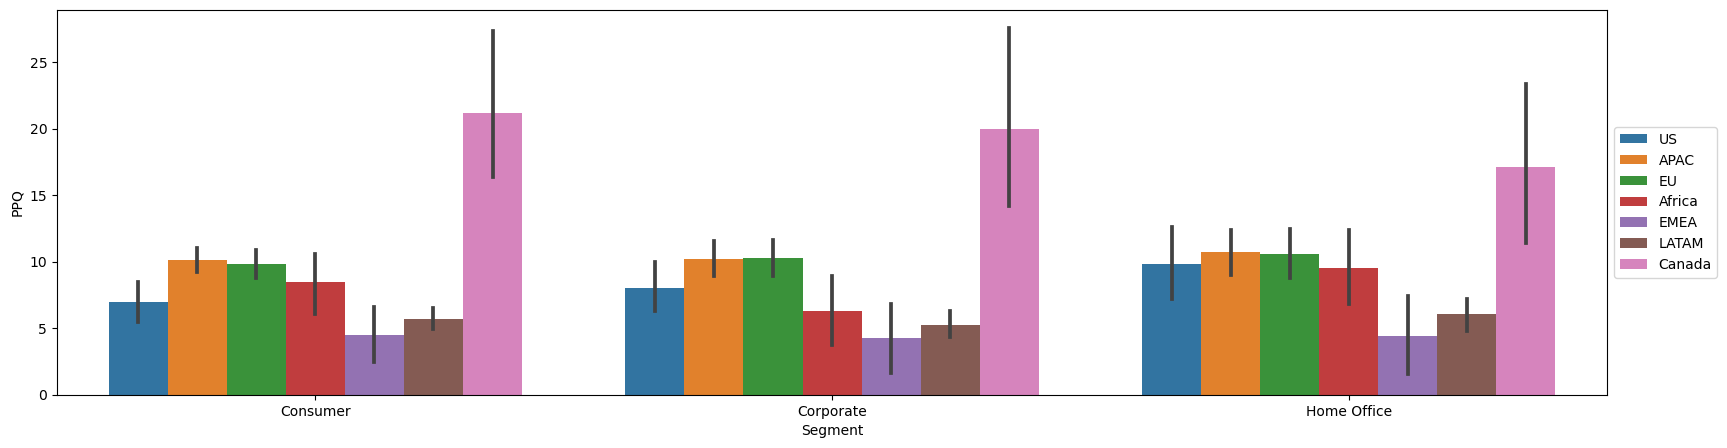

In [43]:
#In each segment selling in which market has most PPQ
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Segment',hue='Market',y='PPQ',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

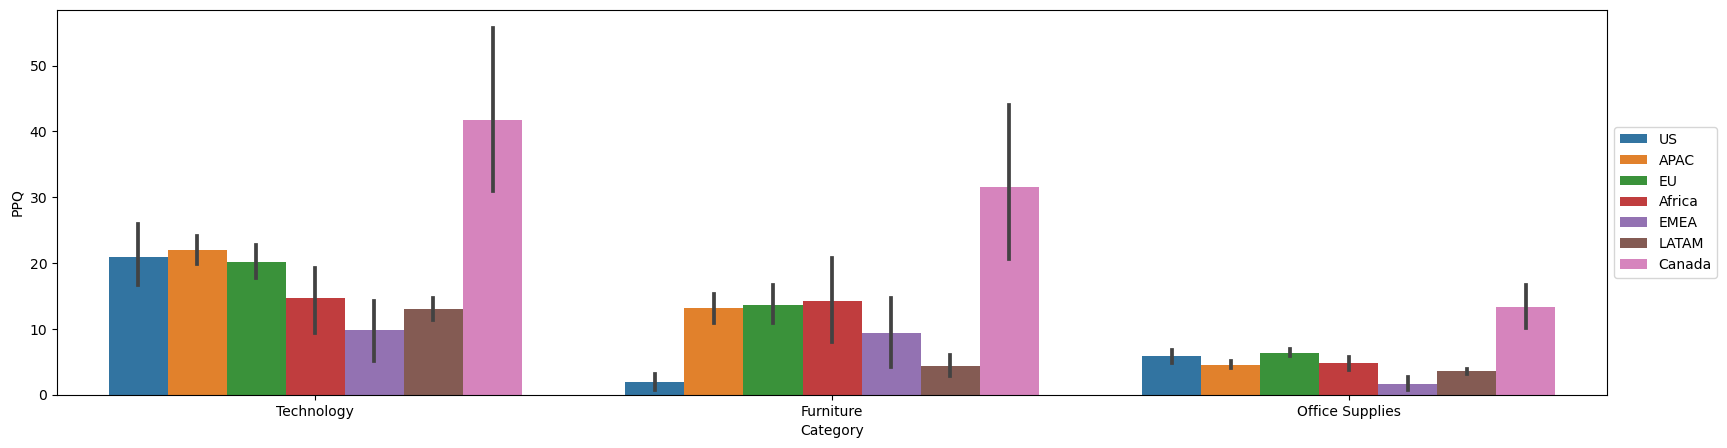

In [44]:
#In each category selling in which market has most PPQ
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Category',hue='Market',y='PPQ',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [45]:
#In each category selling in which market has most GPR
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Category',hue='Market',y='GPR',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [46]:
#In each Market selling to which segment has most PPQ
plt.figure(figsize=(20,5))
sns.barplot(data=df_copy_3,x='Market',hue='Segment',y='PPQ',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [47]:
#In each Market selling in which sub-category has most PPQ
plt.figure(figsize=(5,40))
sns.barplot(data=df_copy_3,y='Market',hue='Sub-Category',x='PPQ',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [81]:
#In each Market selling in which sub-category has most Profit
plt.figure(figsize=(5,40))
sns.barplot(data=df_copy_3,y='Market',hue='Sub-Category',x='Profit',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

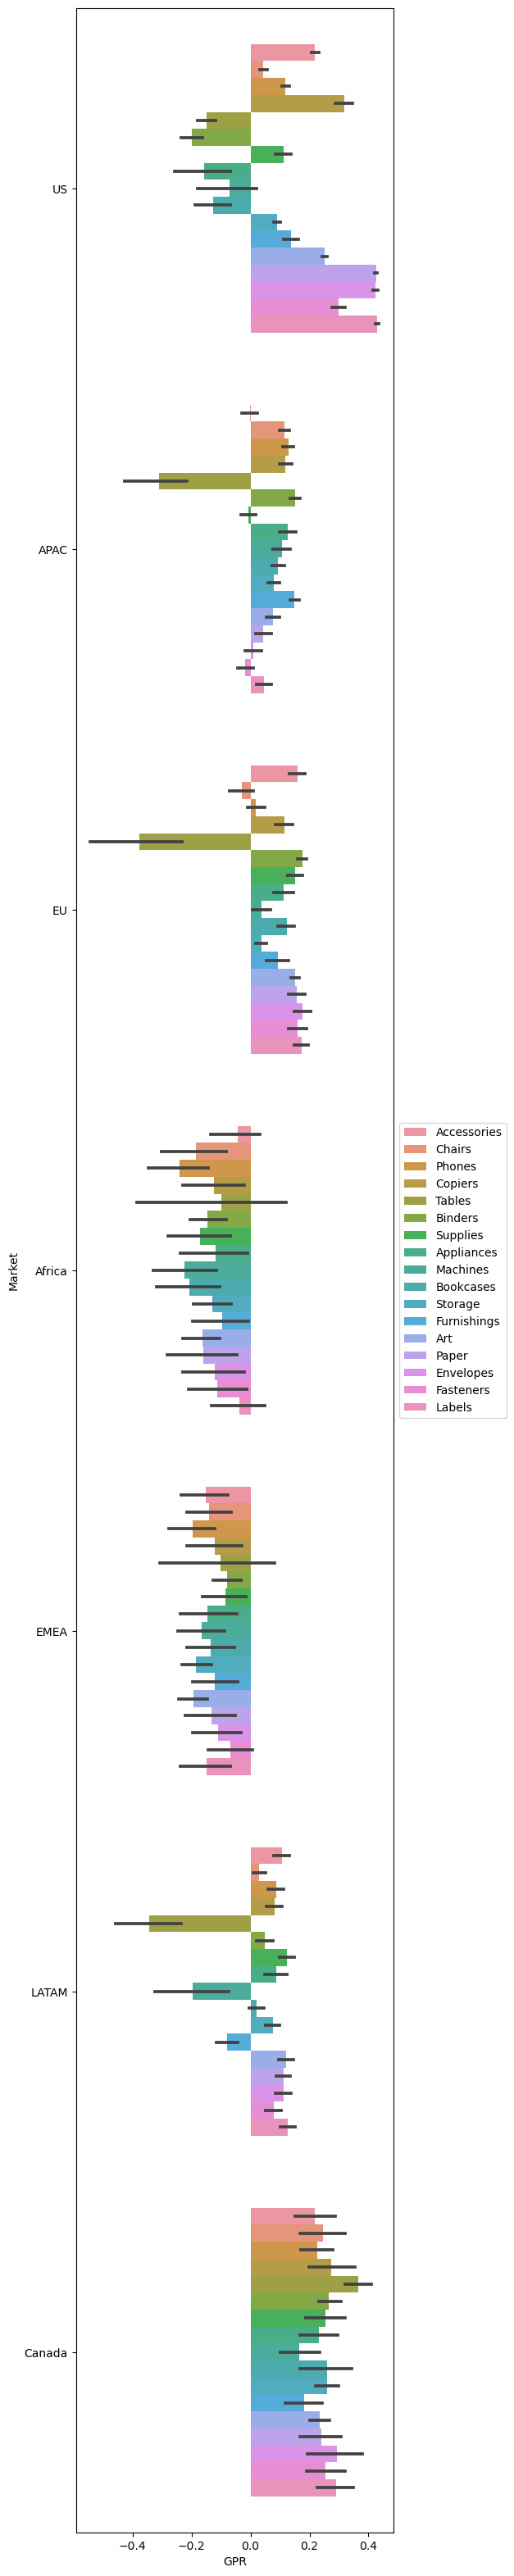

In [82]:
#In each Market selling in which sub-category has most GPR
plt.figure(figsize=(5,40))
sns.barplot(data=df_copy_3,y='Market',hue='Sub-Category',x='GPR',estimator='mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Distribution Plots

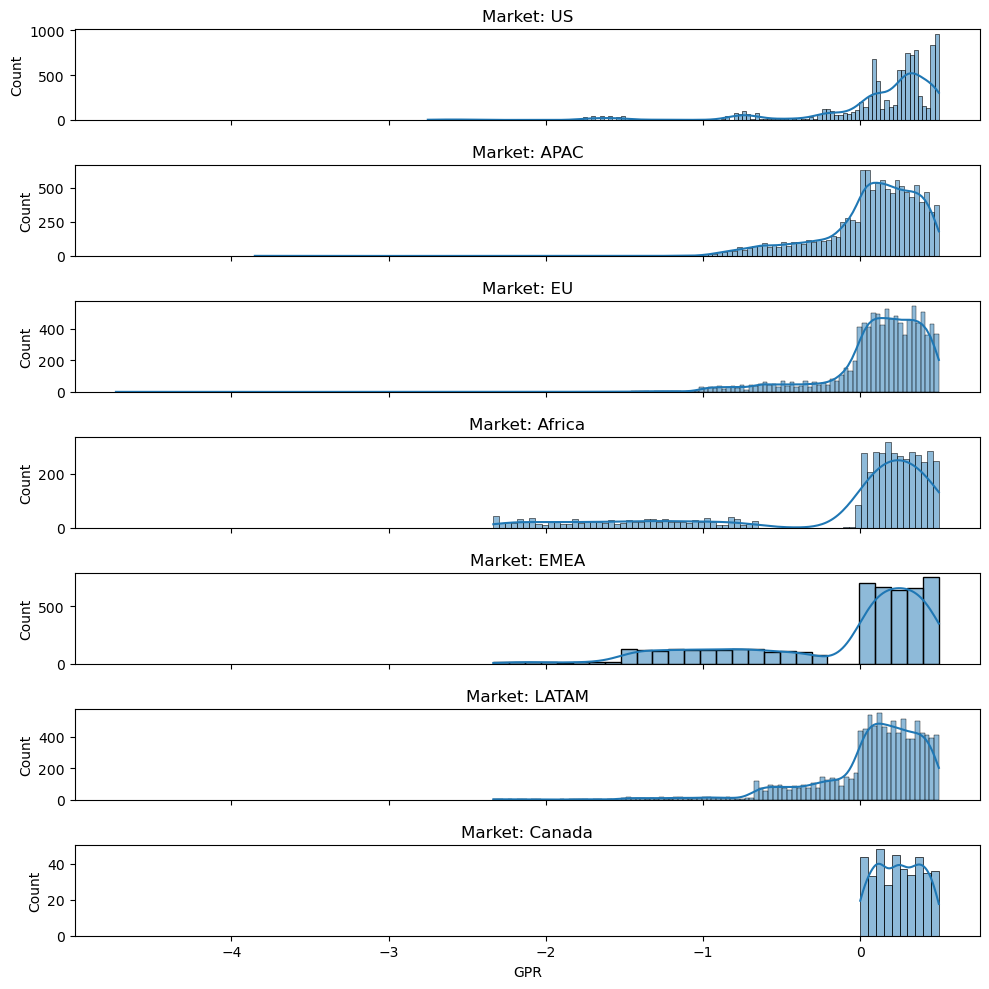

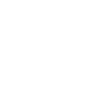

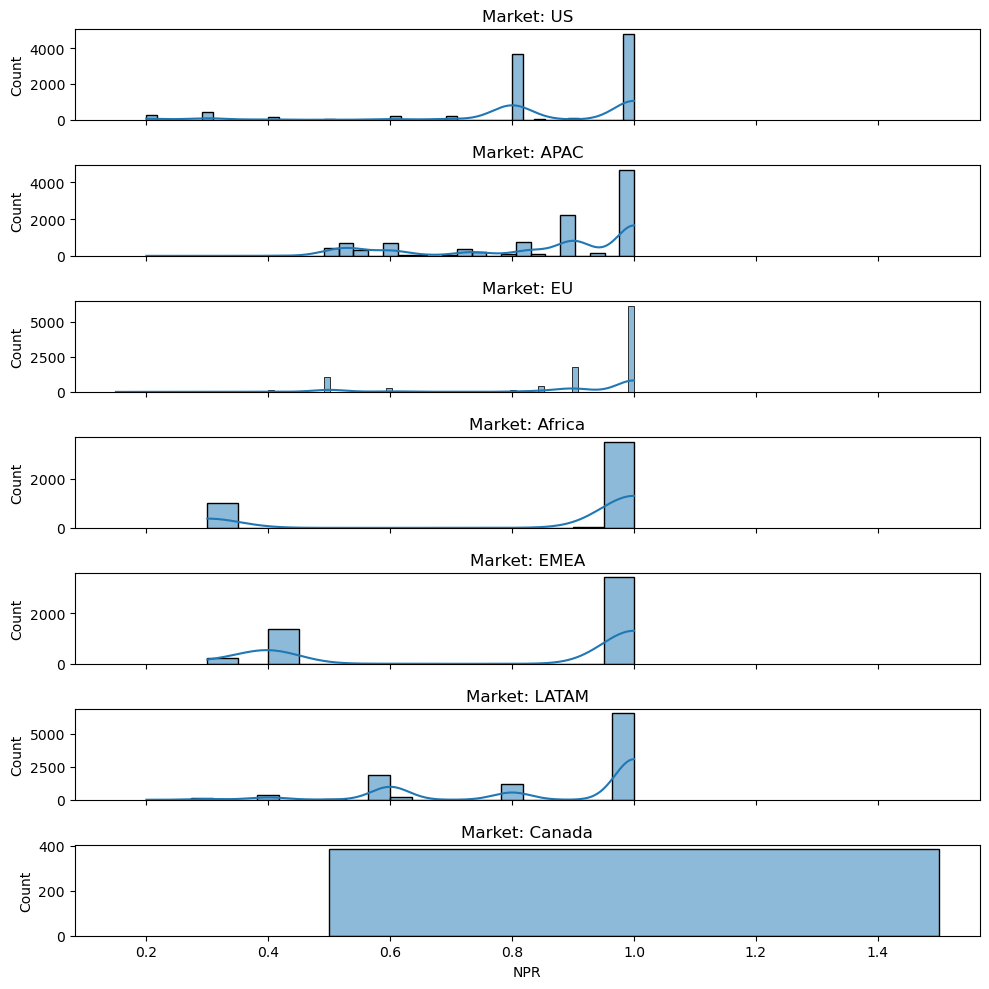

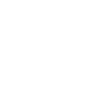

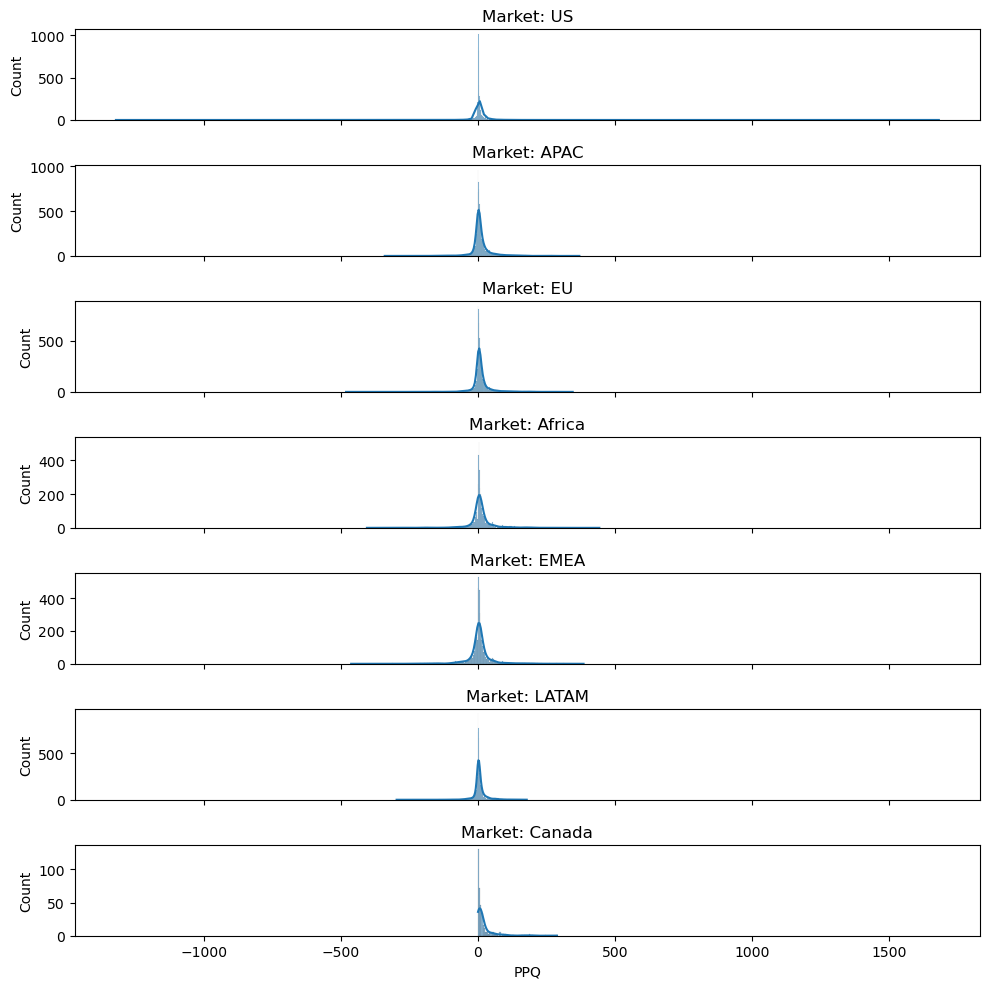

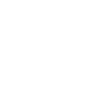

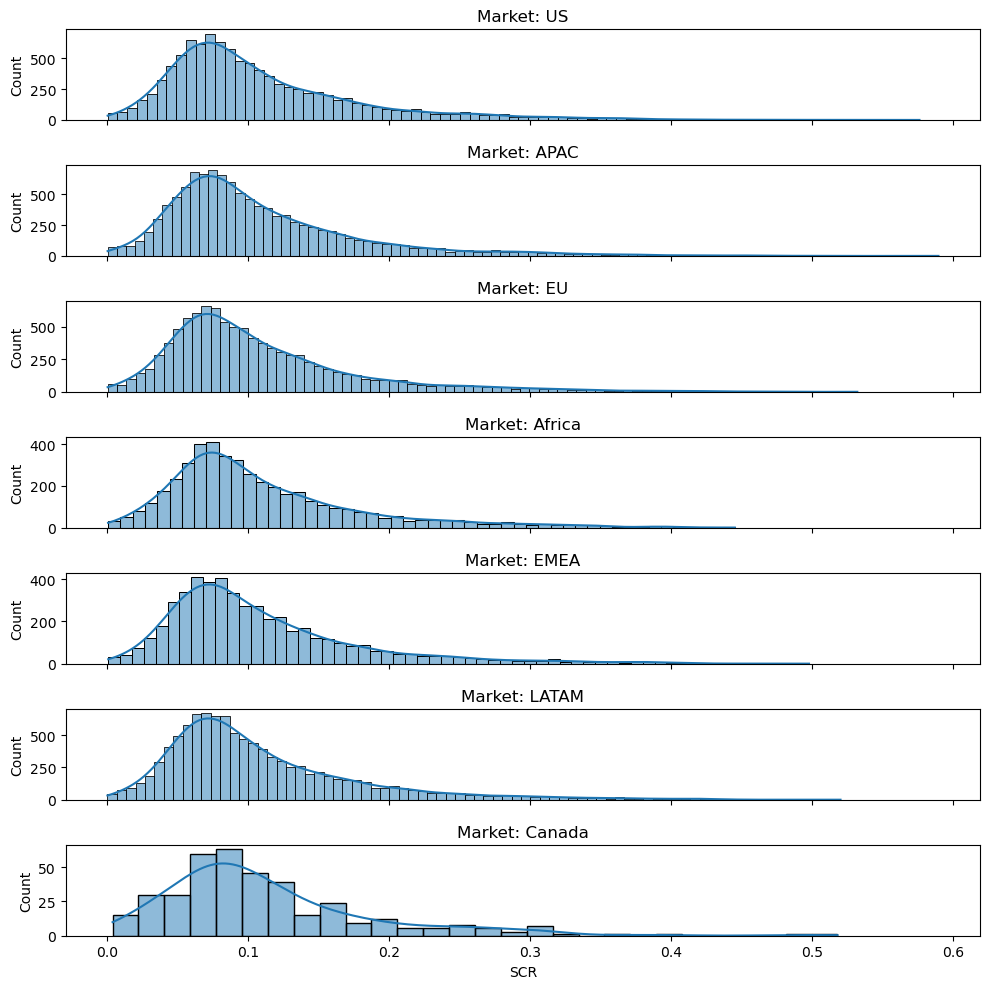

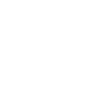

In [48]:
for i in range(len(ind)):
    fig, axes = plt.subplots(figsize=(10,10), nrows=len(df_copy_3['Market'].unique()), ncols=1, sharex=True)
    unique_markets = df_copy_3['Market'].unique()

    for j, market_category in enumerate(unique_markets):
        market_data = df_copy_3[df_copy_3['Market'] == market_category]
        sns.histplot(x=ind[i], data=market_data, ax=axes[j], kde=True)
        axes[j].set_title(f'Market: {market_category}')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
    plt.show()

    plt.subplots(figsize=(1, 1))  # Adjust the size as needed
    plt.axis('off')  # Turn off the axis to create space
    plt.show()


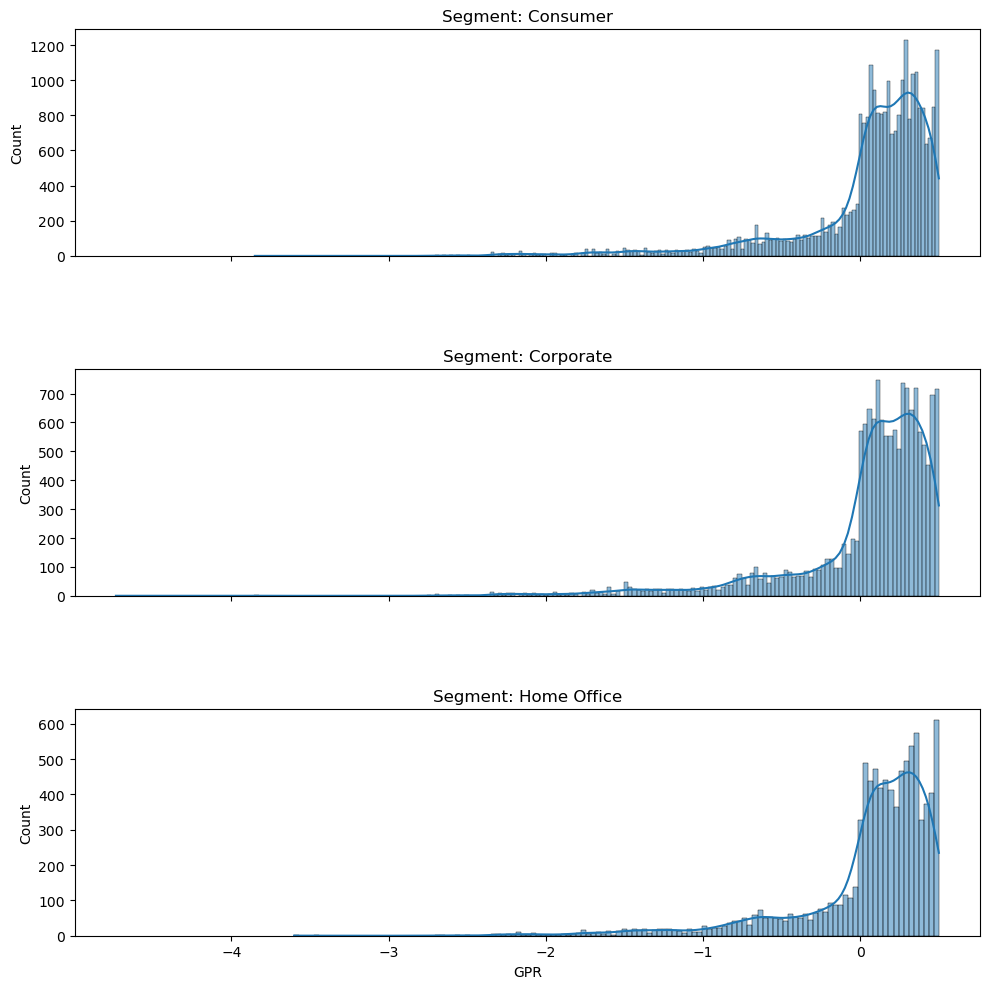

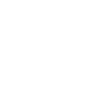

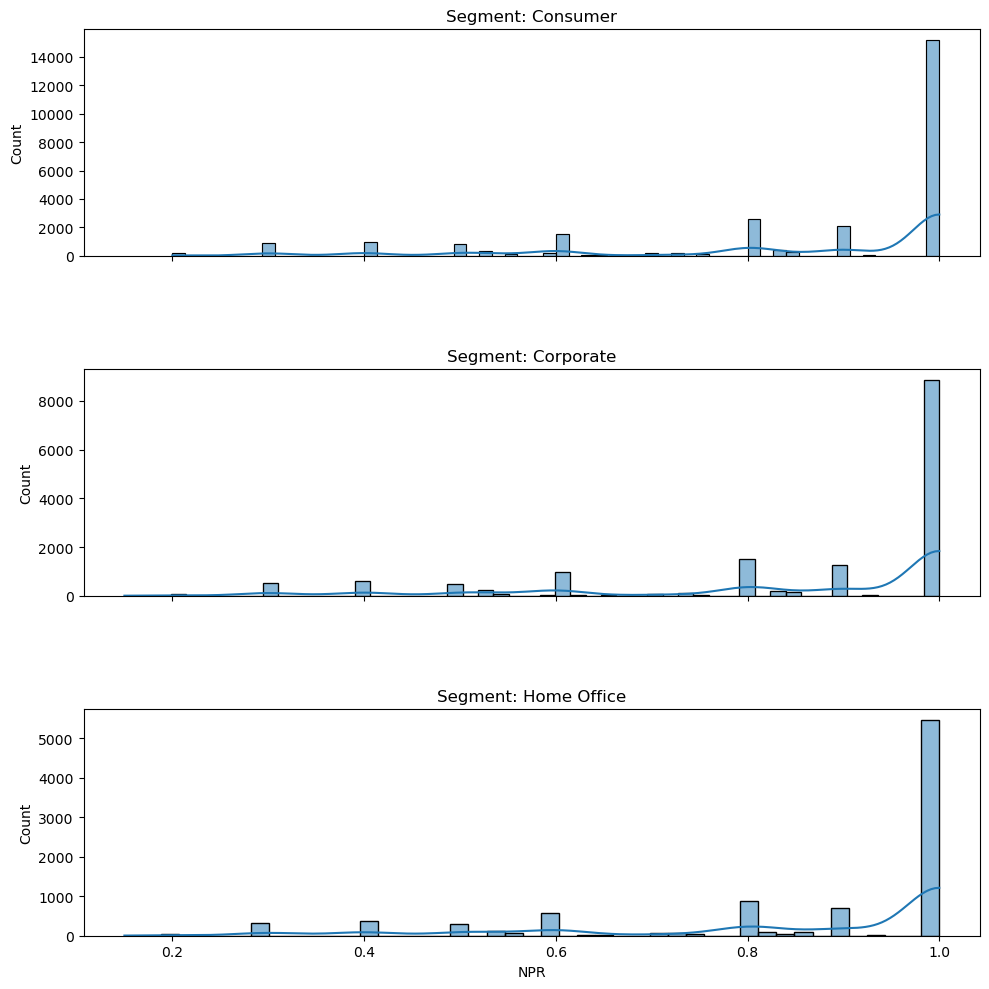

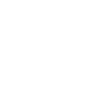

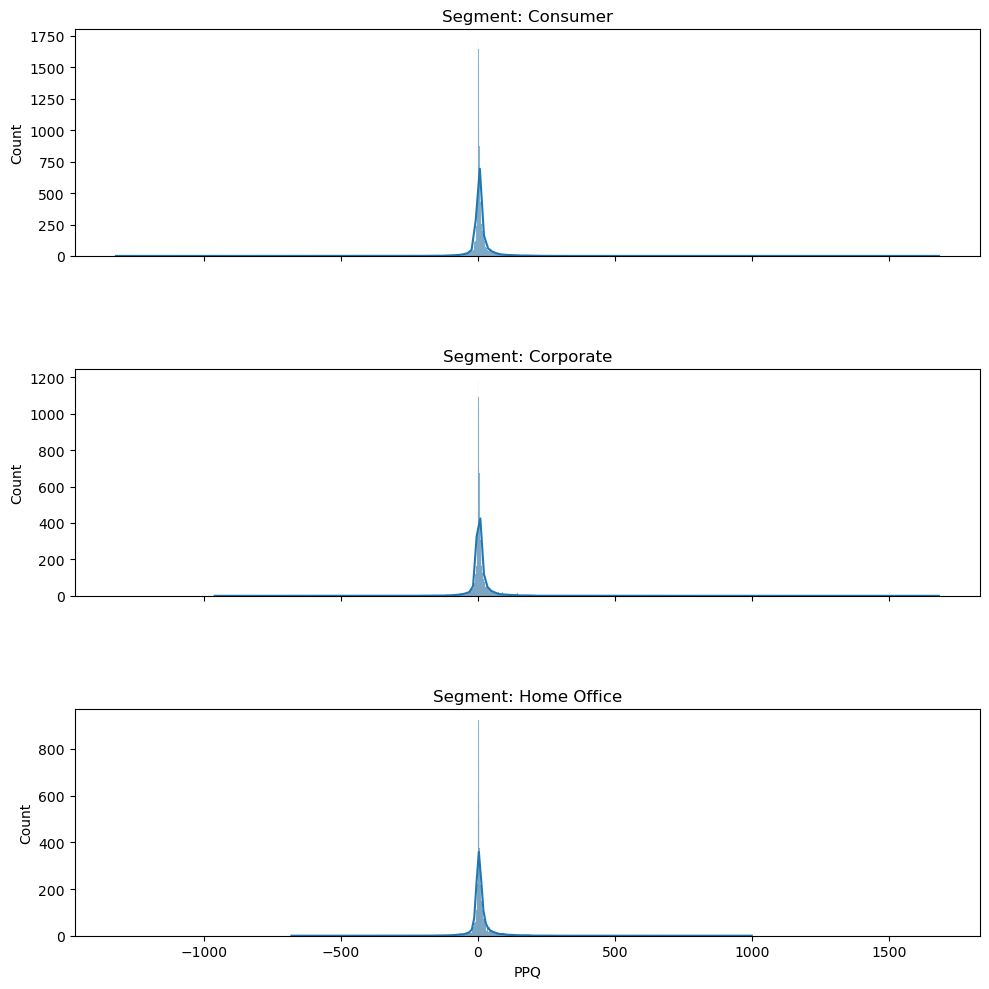

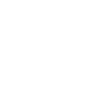

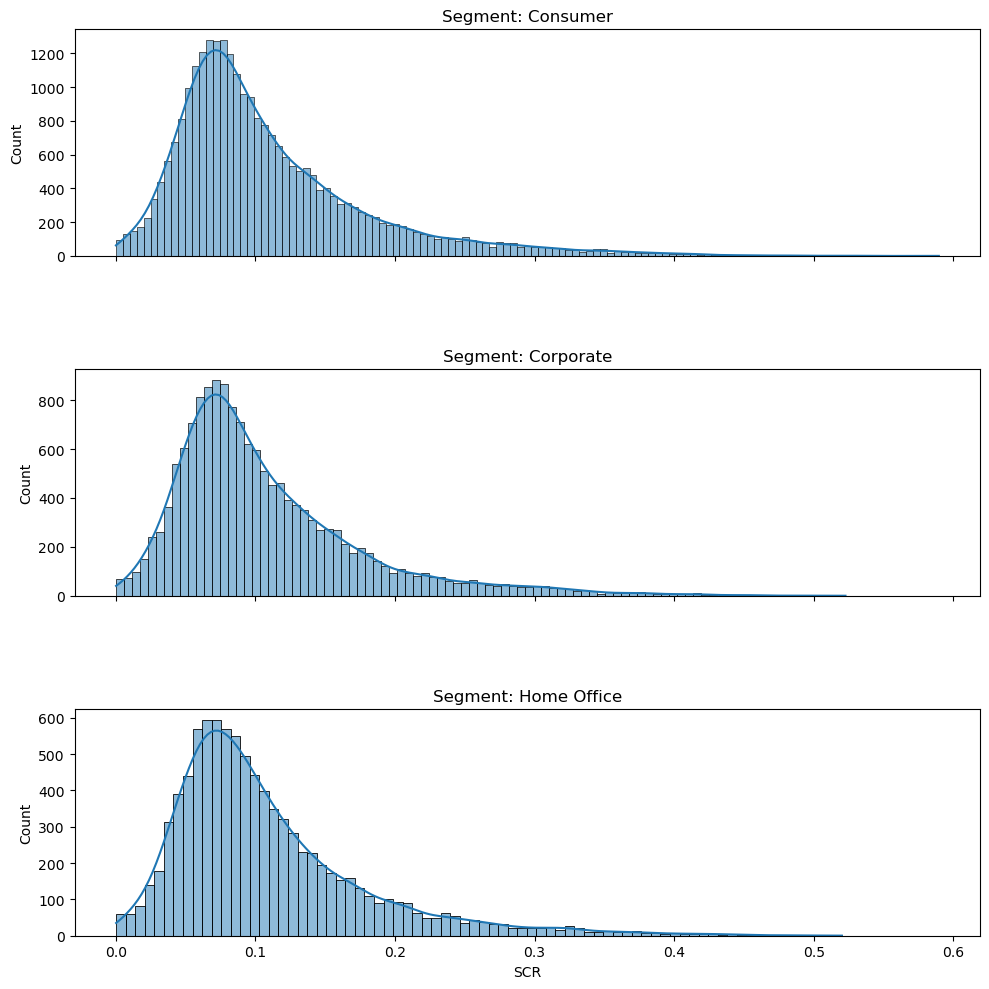

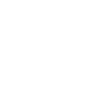

In [49]:
for i in range(len(ind)):
    fig, axes = plt.subplots(figsize=(10,10), nrows=len(df_copy_3['Segment'].unique()), ncols=1, sharex=True)
    unique_segments = df_copy_3['Segment'].unique()

    for j, segment_category in enumerate(unique_segments):
        segment_data = df_copy_3[df_copy_3['Segment'] == segment_category]
        sns.histplot(x=ind[i], data=segment_data, ax=axes[j], kde=True)
        axes[j].set_title(f'Segment: {segment_category}')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
    plt.show()

    plt.subplots(figsize=(1, 1))  # Adjust the size as needed
    plt.axis('off')  # Turn off the axis to create space
    plt.show()

In [50]:
unique_segments = df_copy_3['Segment'].unique()
unique_segments

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

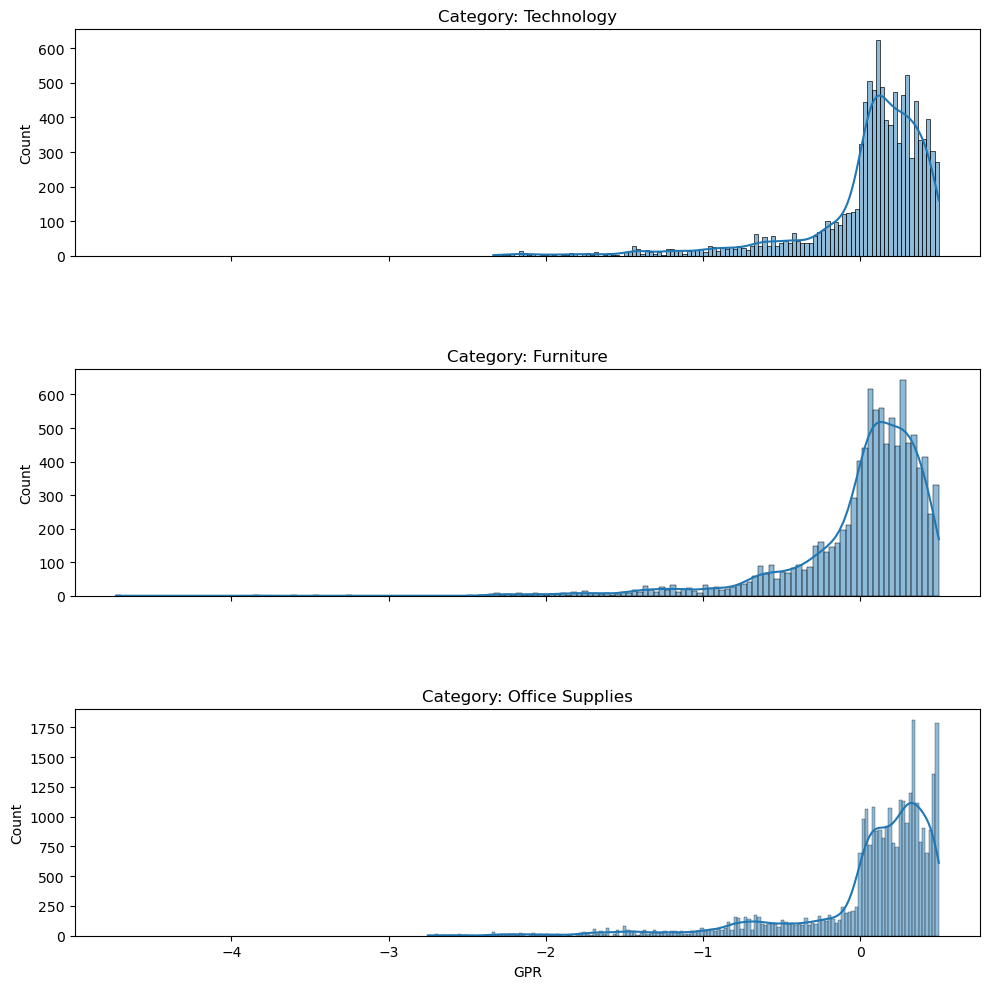

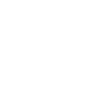

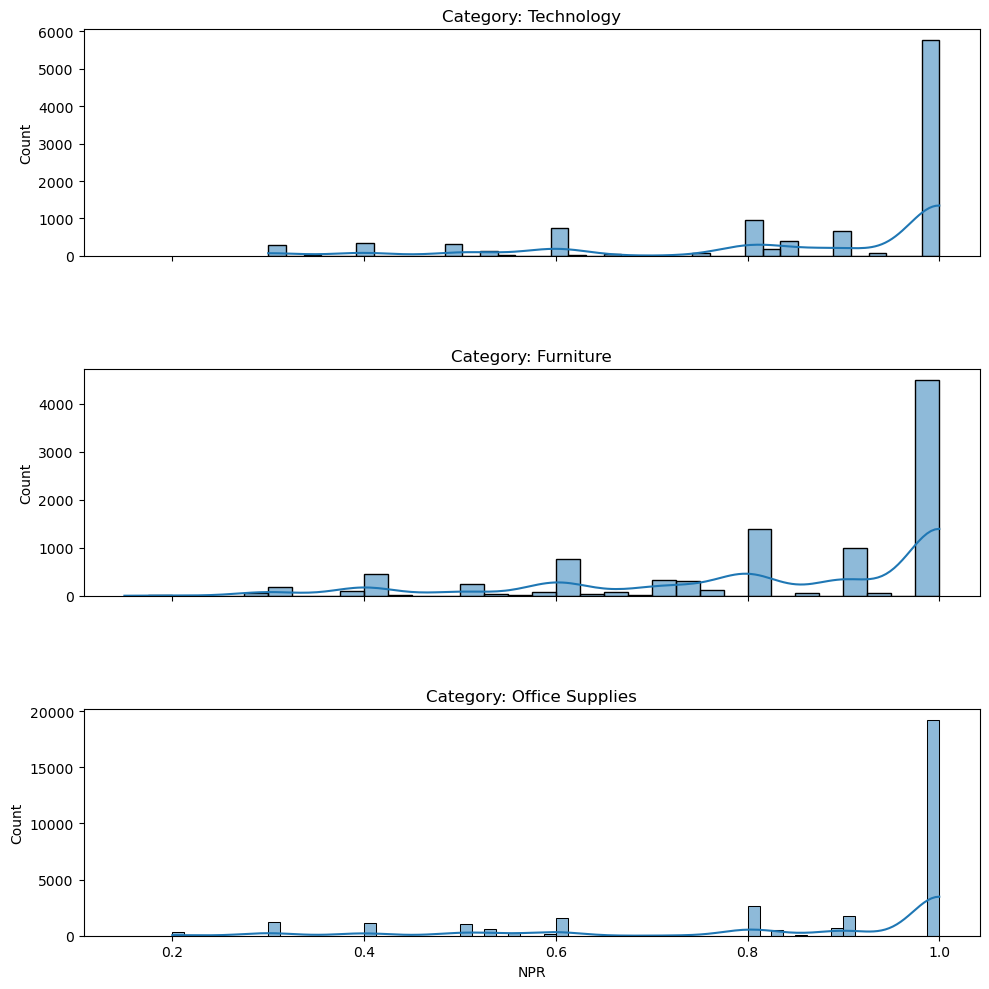

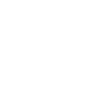

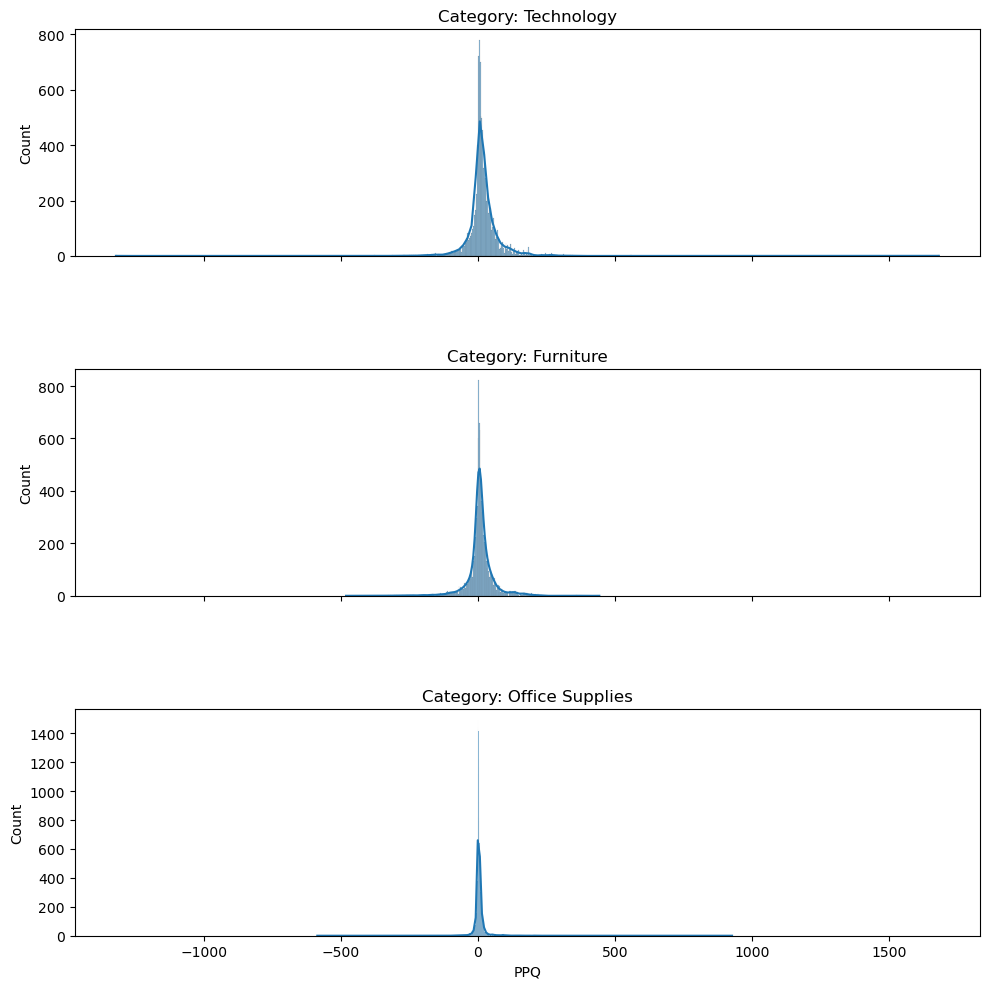

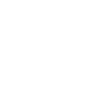

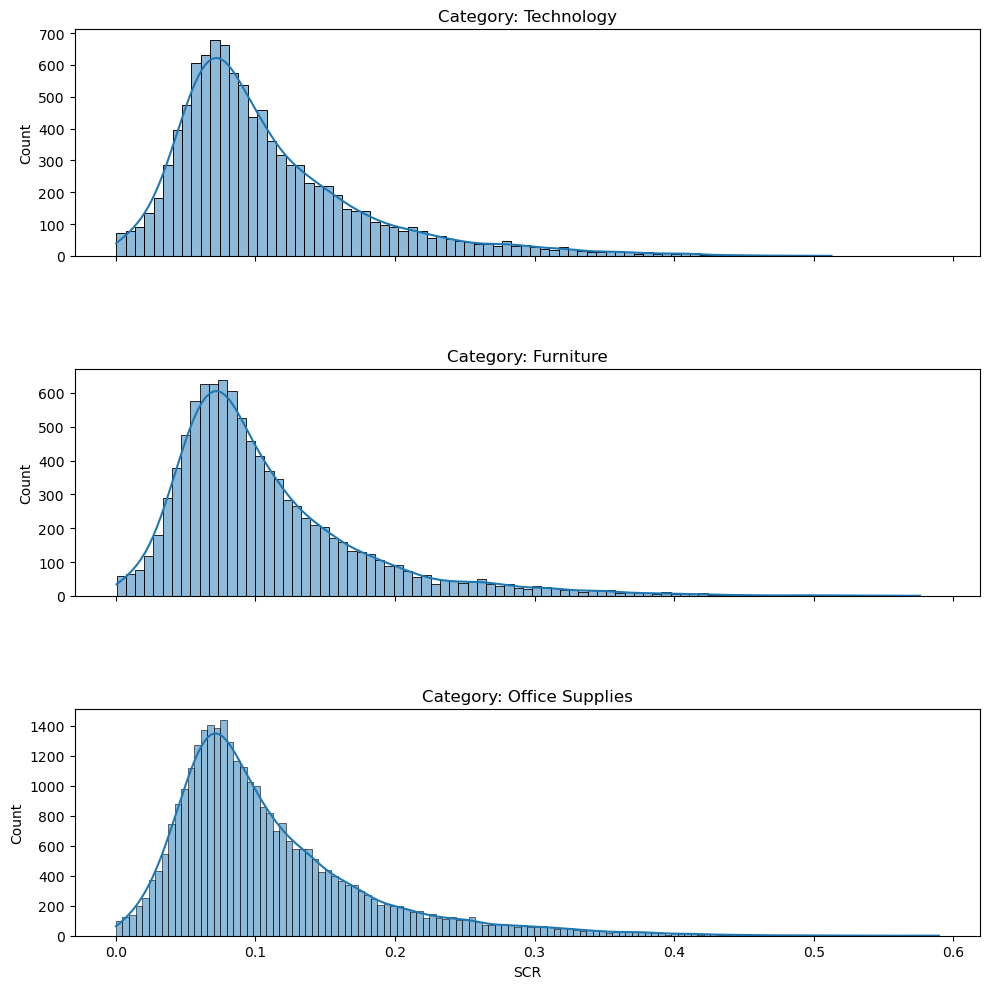

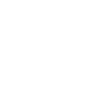

In [51]:
for i in range(len(ind)):
    fig, axes = plt.subplots(figsize=(10,10), nrows=len(df_copy_3['Category'].unique()), ncols=1, sharex=True)
    unique_categories = df_copy_3['Category'].unique()

    for j, category in enumerate(unique_categories):
        category_data = df_copy_3[df_copy_3['Category'] == category]
        sns.histplot(x=ind[i], data=category_data, ax=axes[j], kde=True)
        axes[j].set_title(f'Category: {category}')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
    plt.show()

    plt.subplots(figsize=(1, 1))  # Adjust the size as needed
    plt.axis('off')  # Turn off the axis to create space
    plt.show()


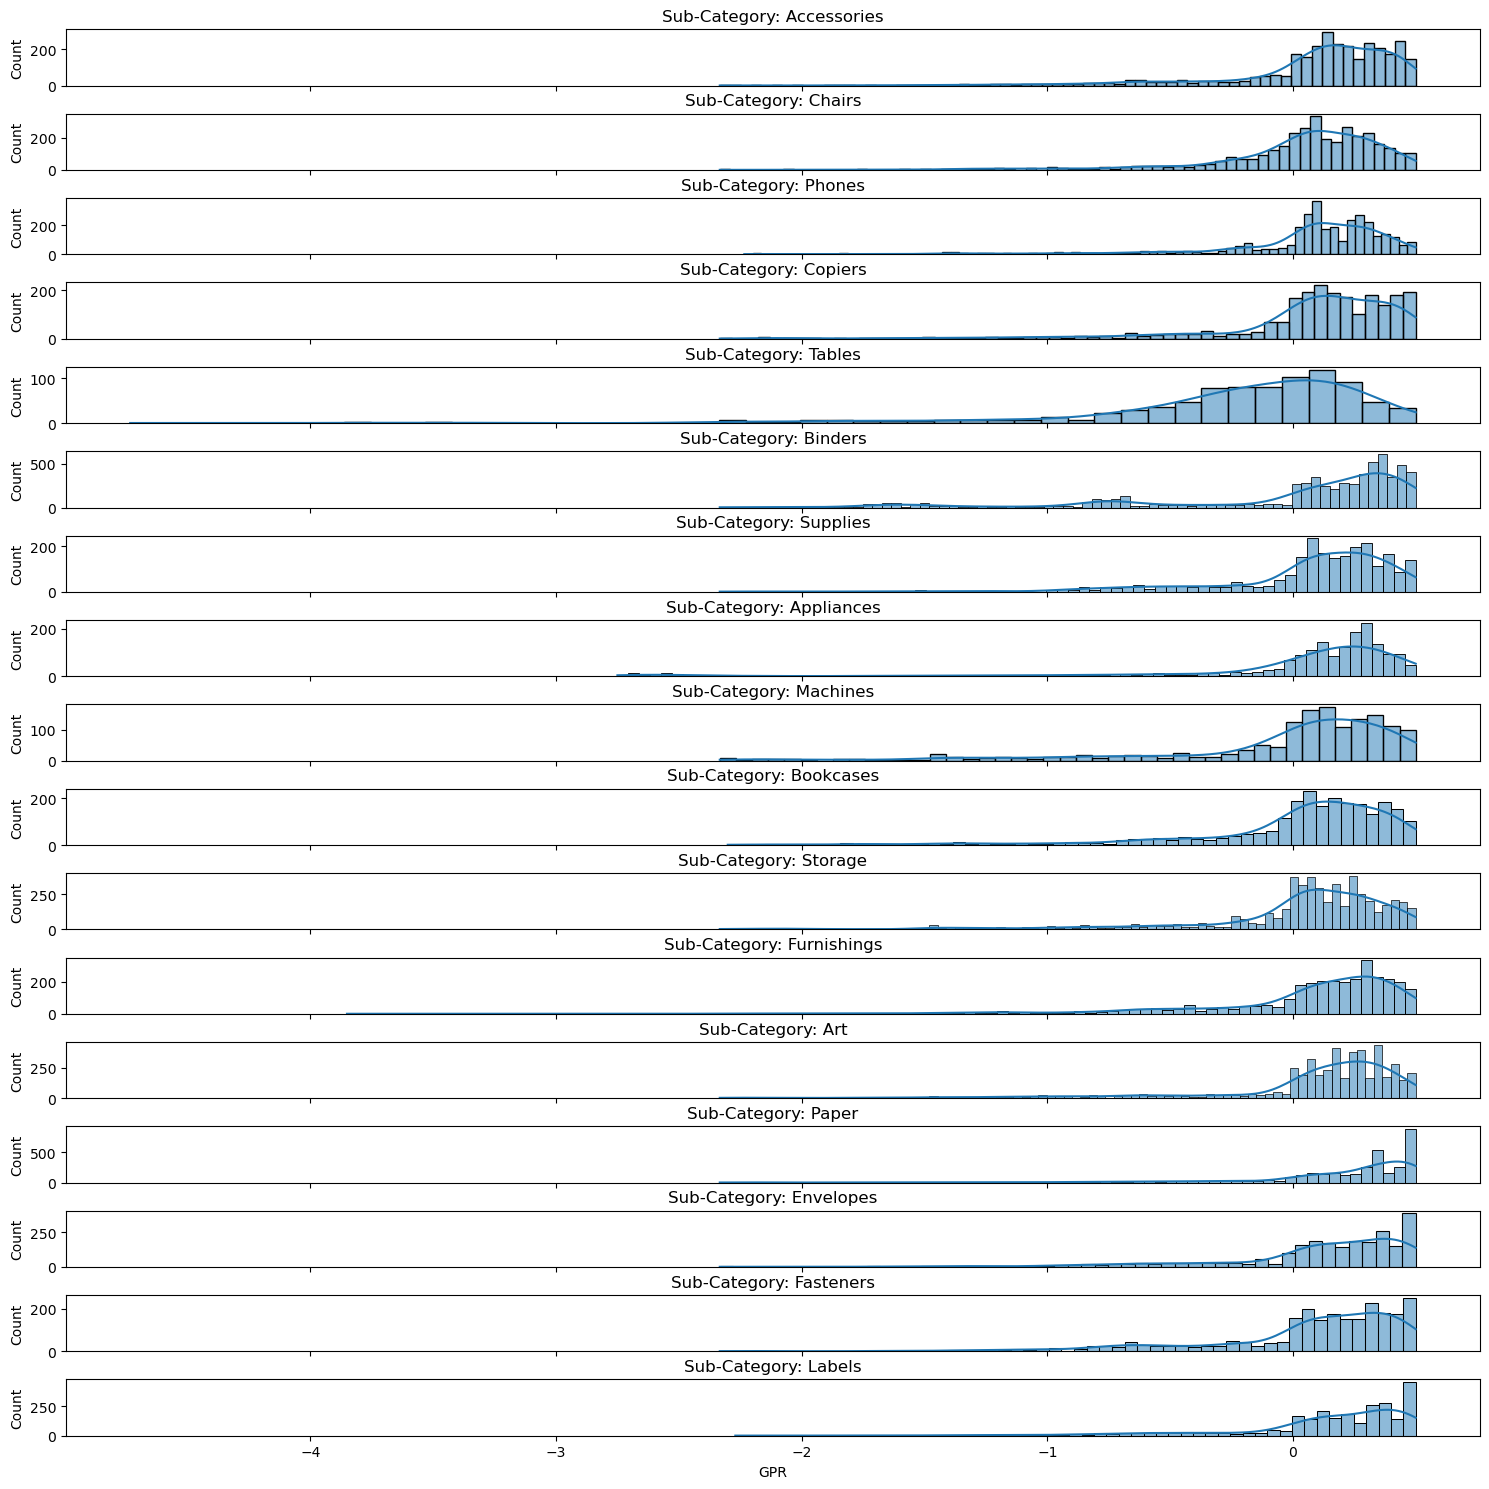

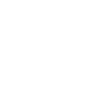

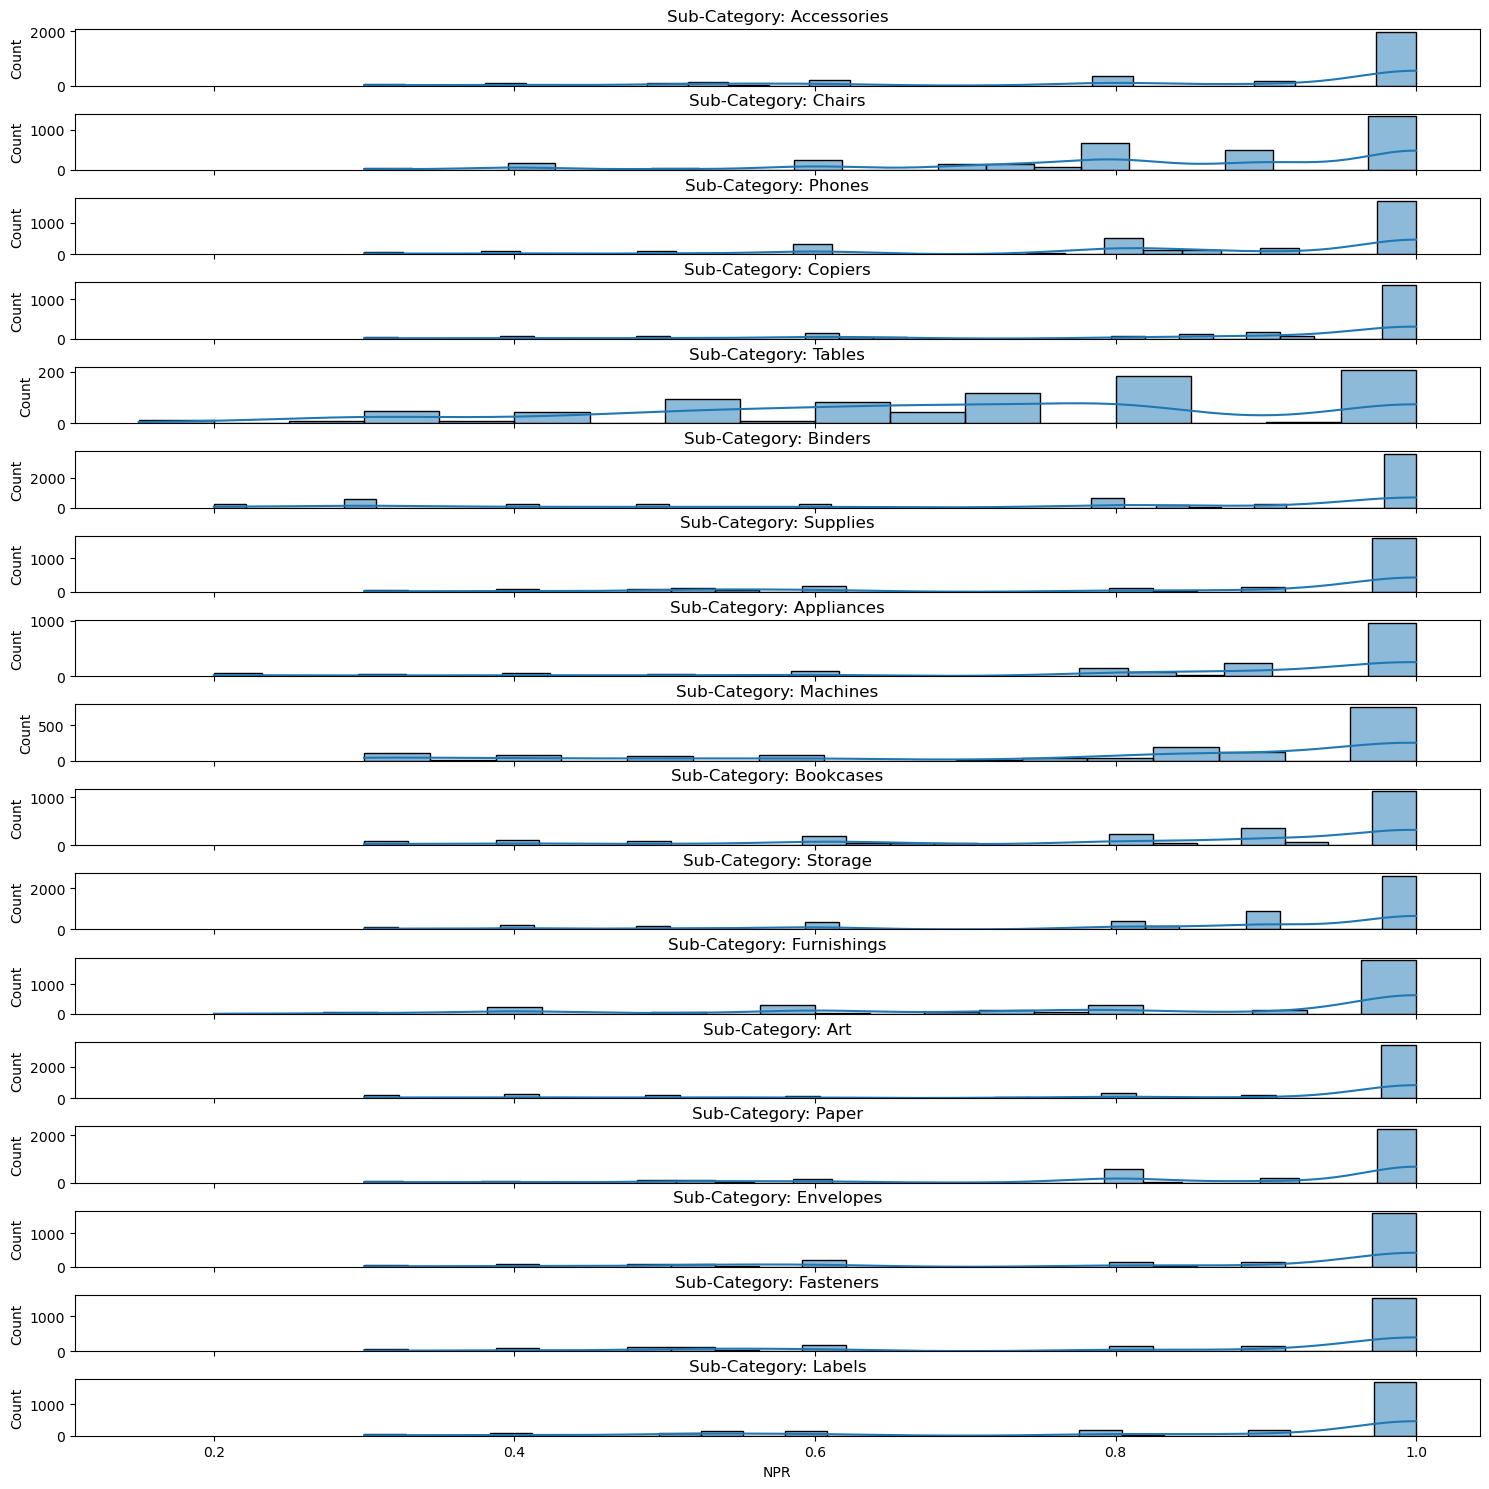

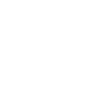

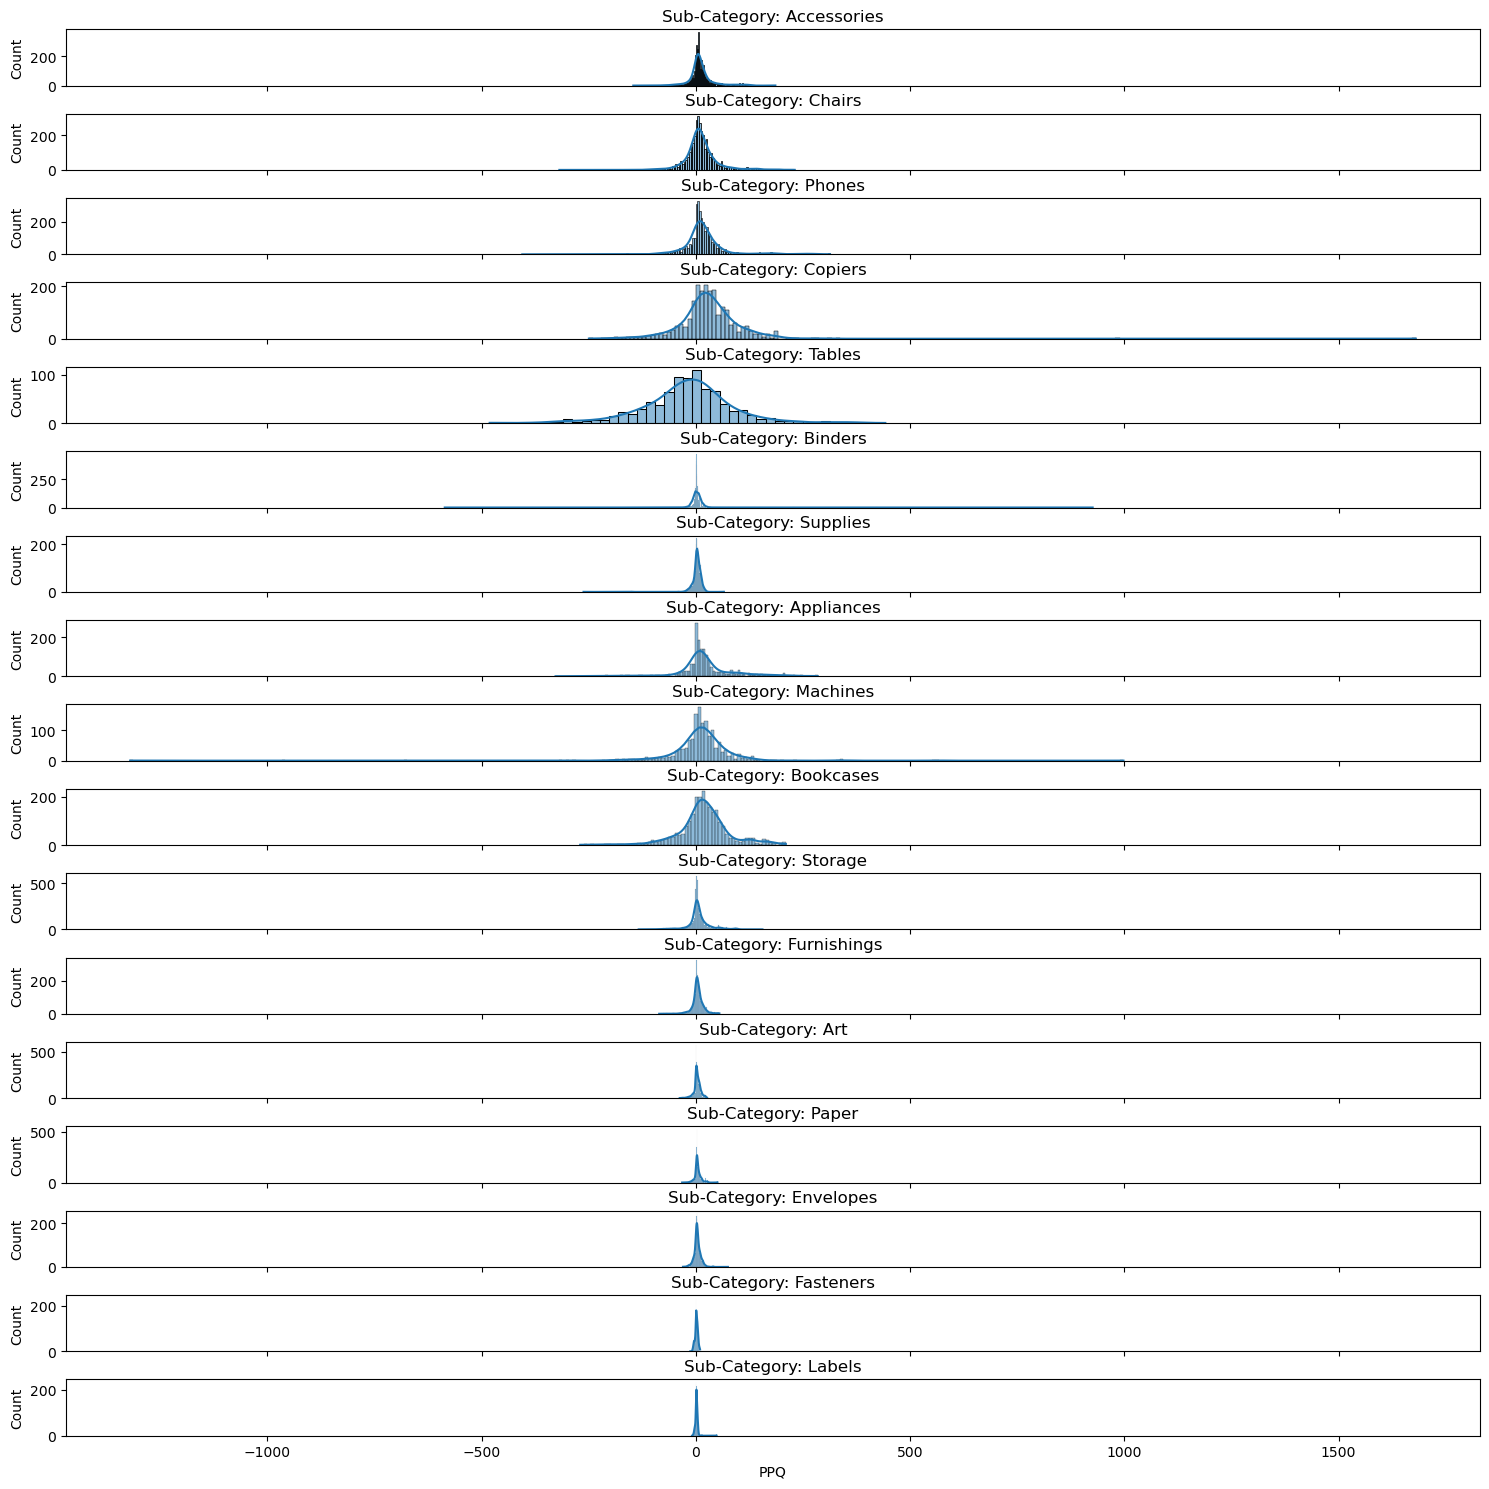

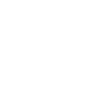

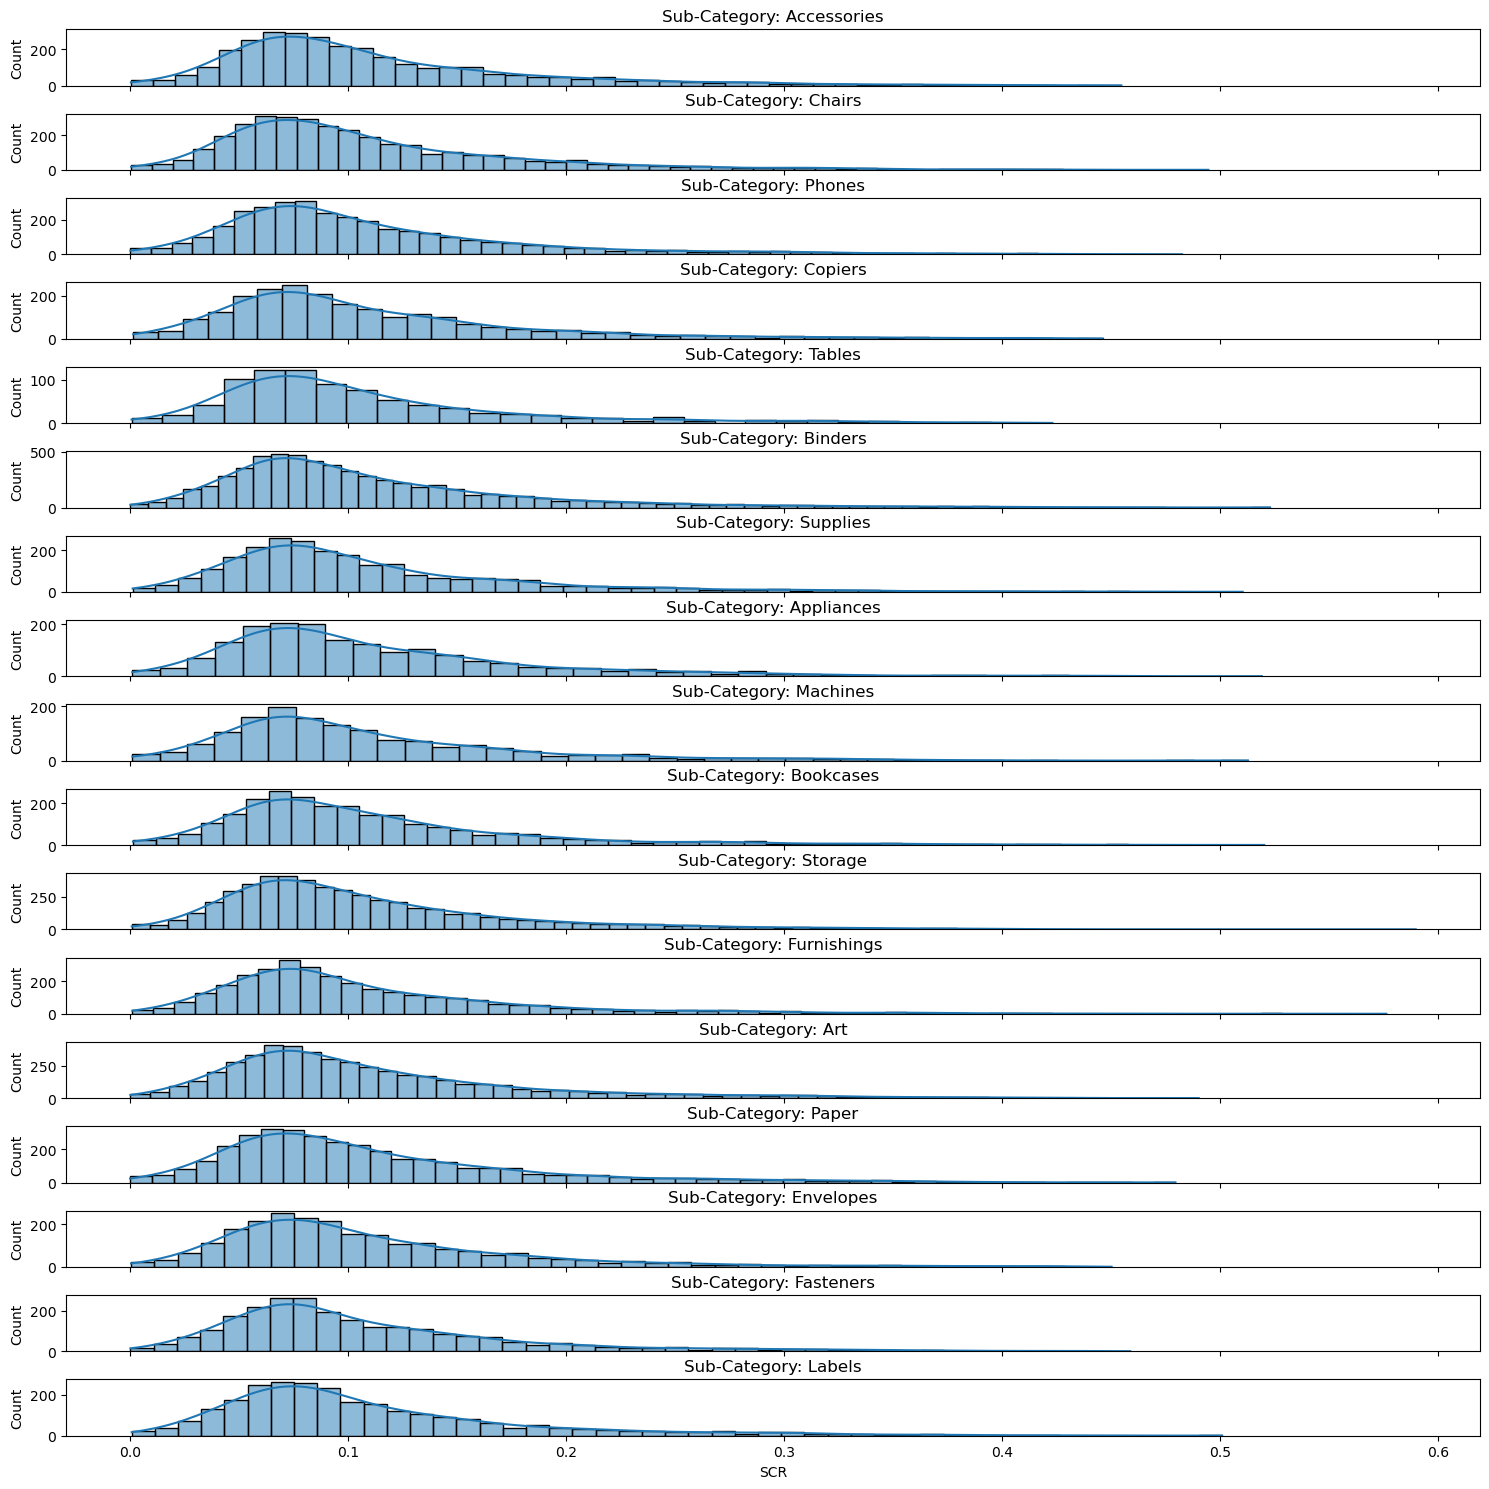

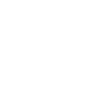

In [52]:
for i in range(len(ind)):
    fig, axes = plt.subplots(figsize=(15,15), nrows=len(df_copy_3['Sub-Category'].unique()), ncols=1, sharex=True)
    unique_subcategories = df_copy_3['Sub-Category'].unique()

    for j, subcategory in enumerate(unique_subcategories):
        subcategory_data = df_copy_3[df_copy_3['Sub-Category'] == subcategory]
        sns.histplot(x=ind[i], data=subcategory_data, ax=axes[j], kde=True)
        axes[j].set_title(f'Sub-Category: {subcategory}')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
    plt.show()

    plt.subplots(figsize=(1, 1))  # Adjust the size as needed
    plt.axis('off')  # Turn off the axis to create space
    plt.show()


## Customer Base Analysis

In [53]:
df_copy_4=df.copy()
df_copy_4.drop('Postal Code', axis=1, inplace=True)
df_copy_4[['GPR','NPR','PPQ','SCR']]=df_copy_3[['GPR','NPR','PPQ','SCR']]
df_copy_4['Order Date']=pd.to_datetime(df_copy_4['Order Date'])
df_copy_4['Year'] = df_copy_4['Order Date'].apply(lambda x: x.year)
df_copy_4['Month'] = df_copy_4['Order Date'].apply(lambda x: x.month_name())
col_mean_plot=['NPR','GPR','PPQ','SCR']
df_copy_4[['NPR','GPR','PPQ','SCR']]=df_copy_3[['NPR','GPR','PPQ','SCR']]
df_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [54]:
#Number of unique Customers in each segment
unique_customers_by_segment=df_copy_4.groupby('Segment')['Customer ID'].nunique()
unique_customers_by_segment

Segment
Consumer       818
Corporate      476
Home Office    296
Name: Customer ID, dtype: int64

Text(0, 0.5, 'Customer Base')

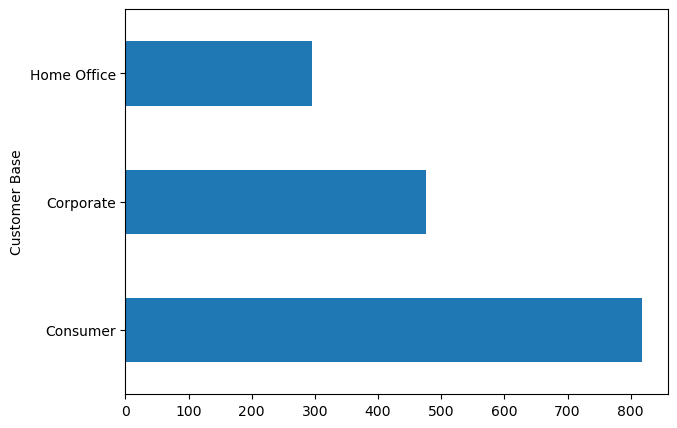

In [55]:
plt.figure(figsize=(7,5))
unique_customers_by_segment.plot(kind='barh')
plt.ylabel('Customer Base')

In [56]:
#Number of unique Customers in each market
unique_customers_by_market=df_copy_4.groupby('Market')['Customer ID'].nunique().reset_index()
unique_customers_by_market

Market  Customer ID
0    APAC          796
1  Africa          754
2  Canada          181
3    EMEA          760
4      EU          795
5   LATAM          794
6      US          793

Text(0.5, 0, 'Customer Base')

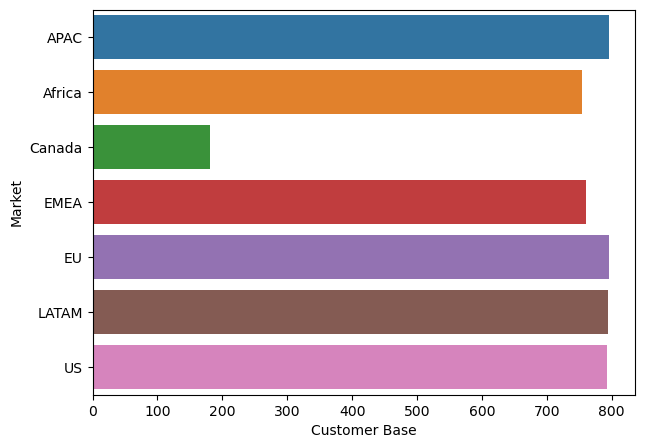

In [57]:
plt.figure(figsize=(7,5))
sns.barplot(data=unique_customers_by_market,x='Customer ID',y='Market')
plt.xlabel('Customer Base')

In [58]:
unique_customers_by_region = df_copy_4.groupby(['Market', 'Region'])['Customer ID'].nunique().reset_index()
unique_customers_by_region

Market          Region  Customer ID
0     APAC    Central Asia          570
1     APAC      North Asia          617
2     APAC         Oceania          705
3     APAC  Southeast Asia          672
4   Africa          Africa          754
5   Canada          Canada          181
6     EMEA            EMEA          760
7       EU         Central          777
8       EU           North          613
9       EU           South          564
10   LATAM       Caribbean          524
11   LATAM         Central          671
12   LATAM           North          670
13   LATAM           South          669
14      US         Central          629
15      US            East          674
16      US           South          512
17      US            West          686

Text(0.5, 0, 'Customer Base')

<Figure size 700x500 with 0 Axes>

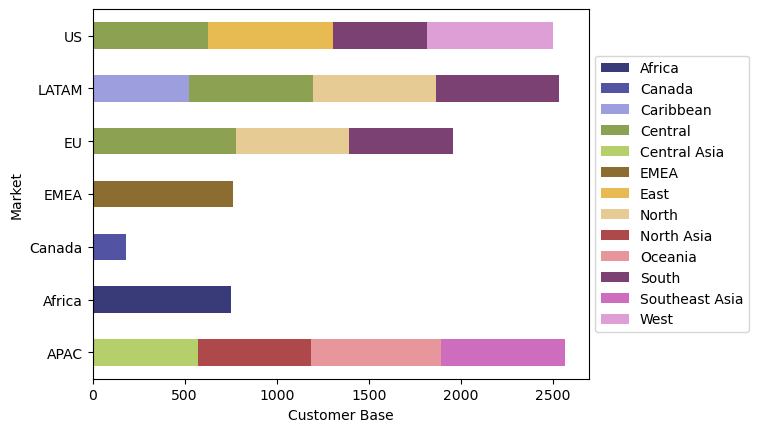

In [59]:
# How much customer base is there is each region of markets
pivot_df = unique_customers_by_region.pivot(index='Market', columns='Region', values='Customer ID').fillna(0)
plt.figure(figsize=(7, 5))
pivot_df.plot(kind='barh', stacked=True, colormap='tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Customer Base')


In [60]:
unique_customers_by_segment_in_each_market = df_copy_4.groupby(['Market', 'Segment'])['Customer ID'].nunique().reset_index()

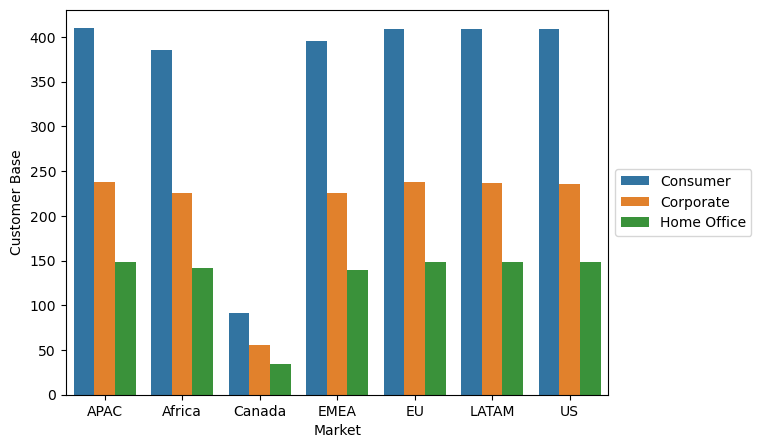

In [61]:
#How much customer base is there in each segment in each market
plt.figure(figsize=(7,5))
sns.barplot(data=unique_customers_by_segment_in_each_market,y='Customer ID',x='Market',hue='Segment')
plt.ylabel('Customer Base')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

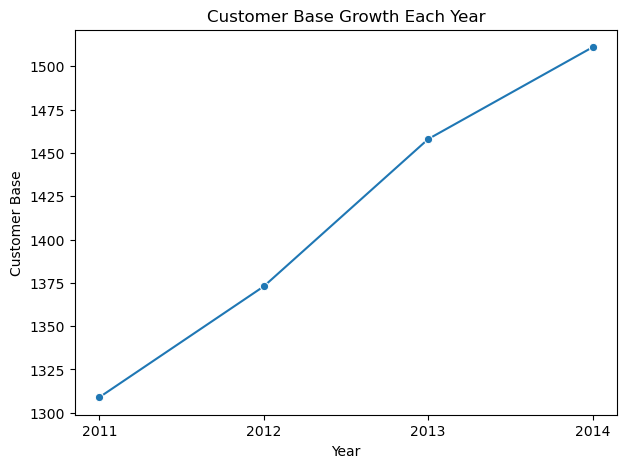

In [62]:
df_unique_customers_by_year = df_copy_4.groupby('Year')['Customer ID'].nunique()
plt.figure(figsize=(7, 5))
sns.lineplot(data=df_unique_customers_by_year,marker='o')
plt.title('Customer Base Growth Each Year')
plt.ylabel('Customer Base')
plt.xticks([2011,2012,2013,2014])
plt.show()

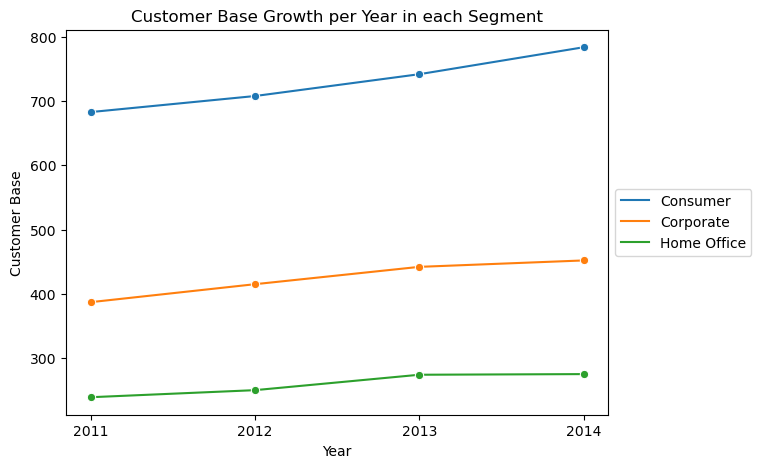

In [63]:
unique_customers_by_segment_year = df_copy_4.groupby(['Year', 'Segment'])['Customer ID'].nunique().reset_index()
#customer base in each segment in subsequent years
plt.figure(figsize=(7,5))
sns.lineplot(data=unique_customers_by_segment_year,x='Year',y='Customer ID',hue='Segment',marker='o')
plt.ylabel('Customer Base')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Customer Base Growth per Year in each Segment')
plt.show()

In [64]:
unique_customers_by_market_year = df_copy_4.groupby(['Year', 'Market'])['Customer ID'].nunique().reset_index()
#customer base in each market in subsequent years
plt.figure(figsize=(7,5))
sns.lineplot(data=unique_customers_by_market_year,x='Year',y='Customer ID',hue='Market',marker='o')
plt.ylabel('Customer Base')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Customer Base Growth per Year in each Market')
plt.show()

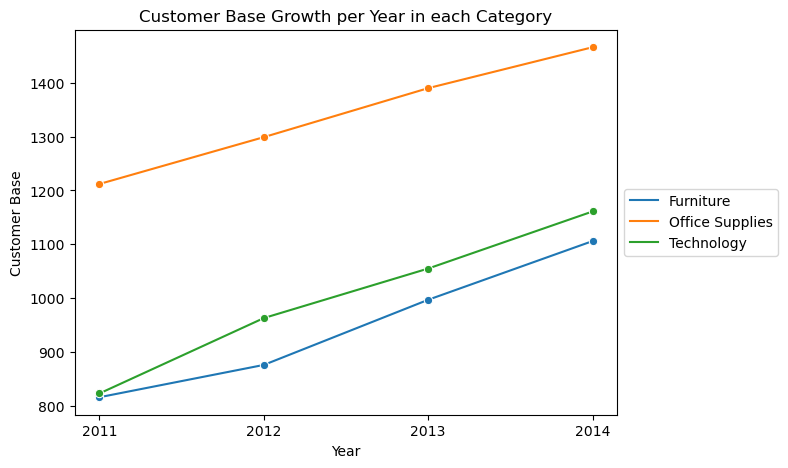

In [65]:
unique_customers_by_category_year = df_copy_4.groupby(['Year', 'Category'])['Customer ID'].nunique().reset_index()
#customer base in each market in subsequent years
plt.figure(figsize=(7,5))
sns.lineplot(data=unique_customers_by_category_year,x='Year',y='Customer ID',hue='Category',marker='o')
plt.ylabel('Customer Base')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Customer Base Growth per Year in each Category')
plt.show()

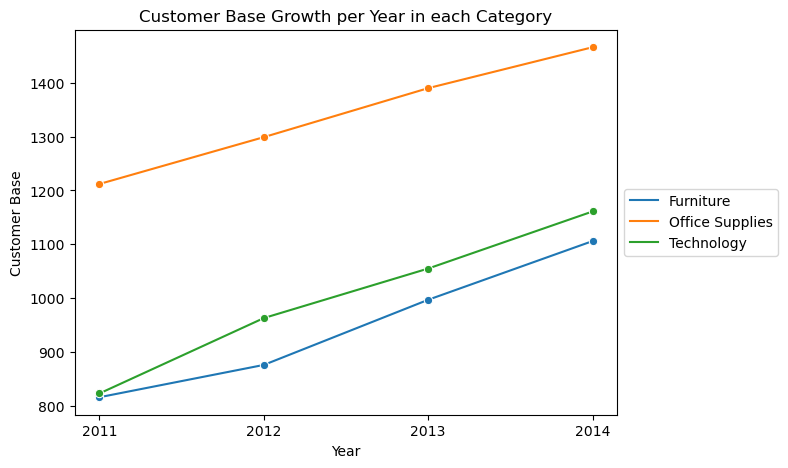

In [66]:
unique_customers_by_category_year = df_copy_4.groupby(['Year','Category'])['Customer ID'].nunique().reset_index()
#customer base in each market in subsequent years
plt.figure(figsize=(7,5))
sns.lineplot(data=unique_customers_by_category_year,x='Year',y='Customer ID',hue='Category',marker='o')
plt.ylabel('Customer Base')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Customer Base Growth per Year in each Category')
plt.show()

## Ratios Over Time


In [67]:
NPR_per_year=df_copy_4.groupby('Year')['NPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=NPR_per_year,x='Year',y='NPR',marker='o')
plt.ylabel('Average NPR')
plt.xticks([2011,2012,2013,2014])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average NPR per year')
plt.show()


In [68]:
GPR_per_year=df_copy_4.groupby('Year')['GPR'].mean().reset_index()
# sns.lineplot(data=df_copy_4,x)
plt.figure(figsize=(7,5))
sns.lineplot(data=GPR_per_year,x='Year',y='GPR',marker='o')
plt.ylabel('Average GPR')
plt.xticks([2011,2012,2013,2014])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average GPR per year')
plt.show()


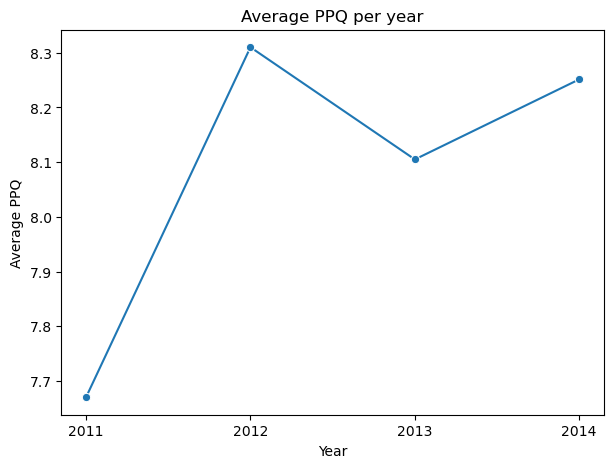

In [69]:
PPQ_per_year=df_copy_4.groupby('Year')['PPQ'].mean().reset_index()
# sns.lineplot(data=df_copy_4,x)
plt.figure(figsize=(7,5))
sns.lineplot(data=PPQ_per_year,x='Year',y='PPQ',marker='o')
plt.ylabel('Average PPQ')
plt.xticks([2011,2012,2013,2014])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average PPQ per year')
plt.show()


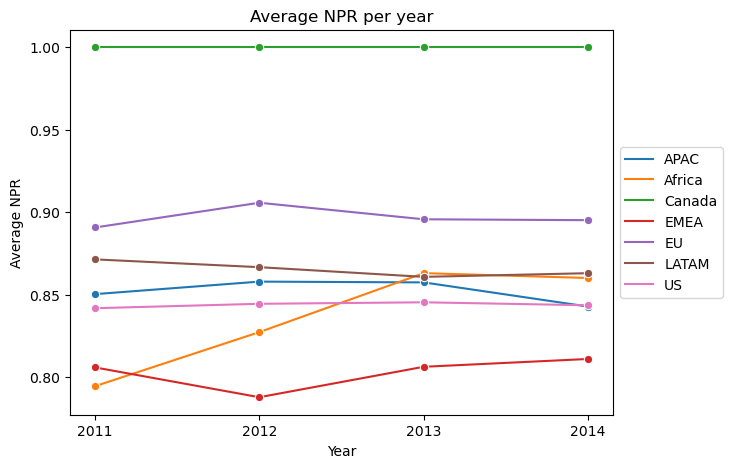

In [70]:
NPR_per_year_market=df_copy_4.groupby(['Year','Market'])['NPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=NPR_per_year_market,x='Year',y='NPR',marker='o',hue='Market')
plt.ylabel('Average NPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average NPR per year')
plt.show()

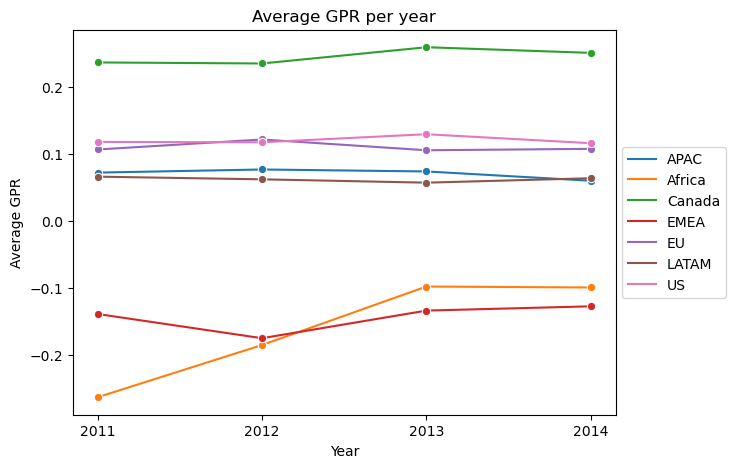

In [71]:
GPR_per_year_market=df_copy_4.groupby(['Year','Market'])['GPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=GPR_per_year_market,x='Year',y='GPR',marker='o',hue='Market')
plt.ylabel('Average GPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average GPR per year')
plt.show()

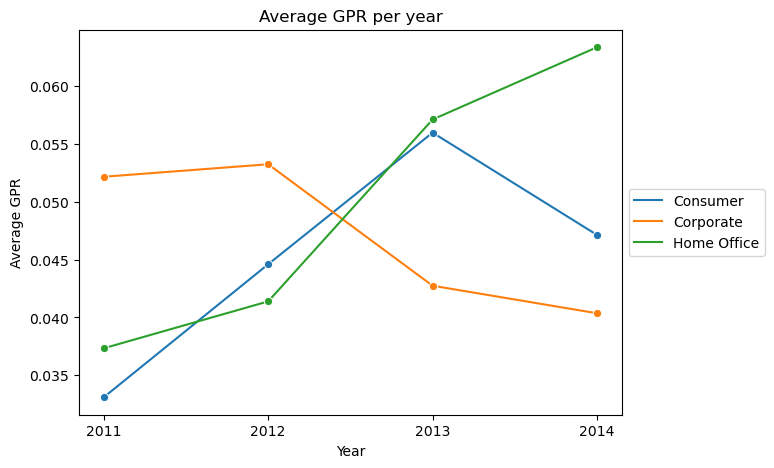

In [72]:
GPR_per_year_segment=df_copy_4.groupby(['Year','Segment'])['GPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=GPR_per_year_segment,x='Year',y='GPR',marker='o',hue='Segment')
plt.ylabel('Average GPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average GPR per year')
plt.show()

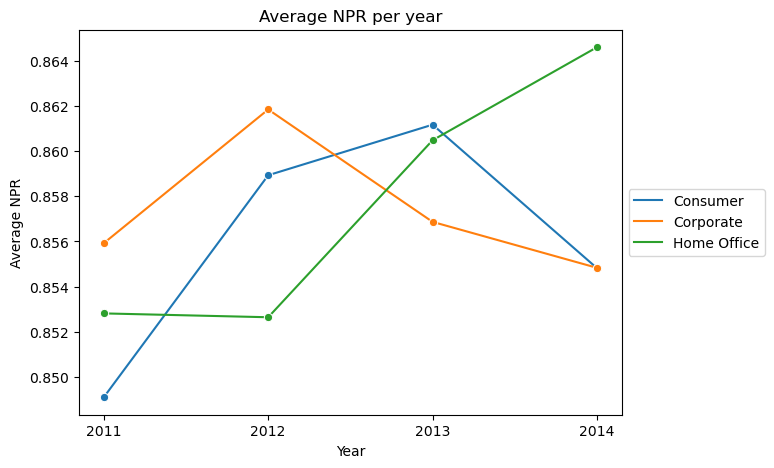

In [73]:
NPR_per_year_segment=df_copy_4.groupby(['Year','Segment'])['NPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=NPR_per_year_segment,x='Year',y='NPR',marker='o',hue='Segment')
plt.ylabel('Average NPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average NPR per year')
plt.show()

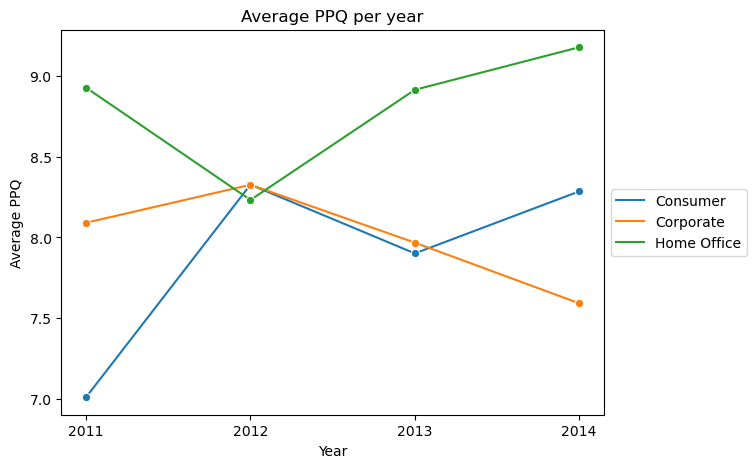

In [74]:
PPQ_per_year_segment=df_copy_4.groupby(['Year','Segment'])['PPQ'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=PPQ_per_year_segment,x='Year',y='PPQ',marker='o',hue='Segment')
plt.ylabel('Average PPQ')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average PPQ per year')
plt.show()

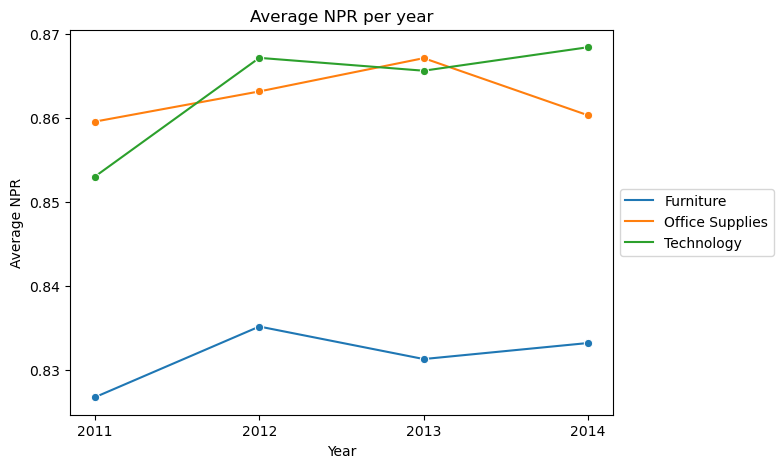

In [75]:
NPR_per_year_category=df_copy_4.groupby(['Year','Category'])['NPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=NPR_per_year_category,x='Year',y='NPR',marker='o',hue='Category')
plt.ylabel('Average NPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average NPR per year')
plt.show()

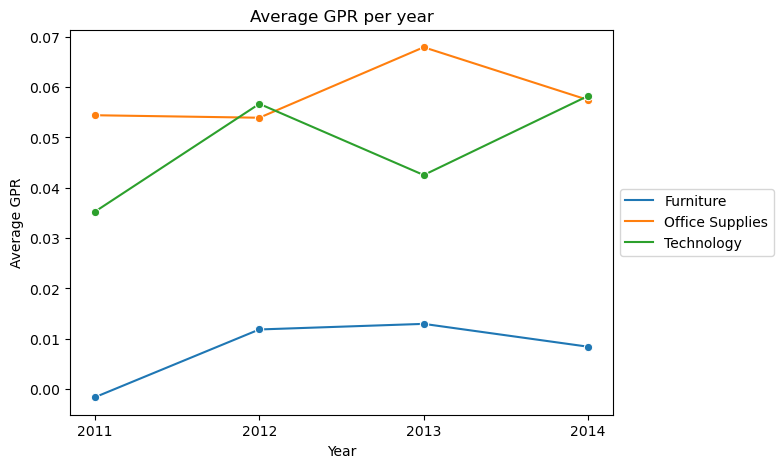

In [76]:
GPR_per_year_category=df_copy_4.groupby(['Year','Category'])['GPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=GPR_per_year_category,x='Year',y='GPR',marker='o',hue='Category')
plt.ylabel('Average GPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average GPR per year')
plt.show()

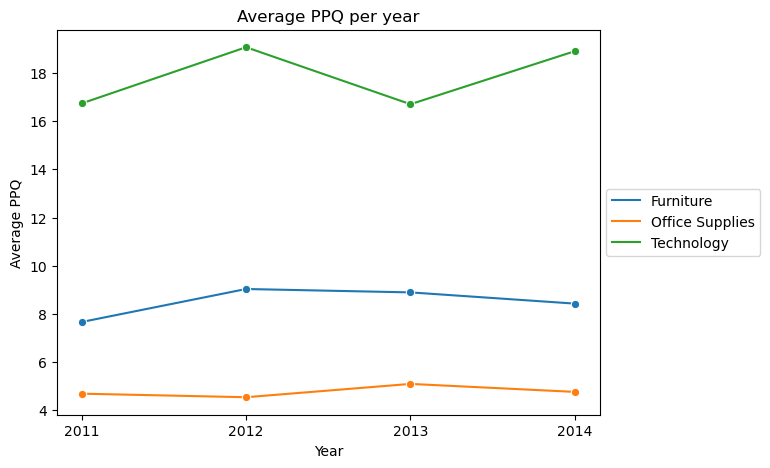

In [77]:
PPQ_per_year_category=df_copy_4.groupby(['Year','Category'])['PPQ'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=PPQ_per_year_category,x='Year',y='PPQ',marker='o',hue='Category')
plt.ylabel('Average PPQ')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average PPQ per year')
plt.show()

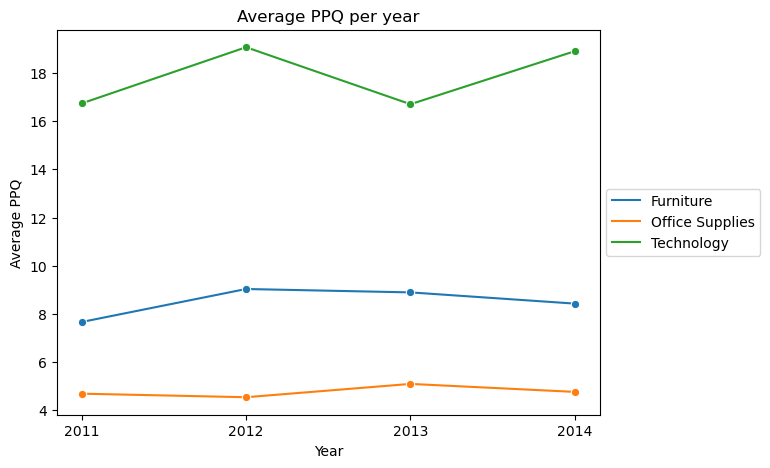

In [78]:
PPQ_per_year_category=df_copy_4.groupby(['Year','Category'])['PPQ'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=PPQ_per_year_category,x='Year',y='PPQ',marker='o',hue='Category')
plt.ylabel('Average PPQ')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average PPQ per year')
plt.show()

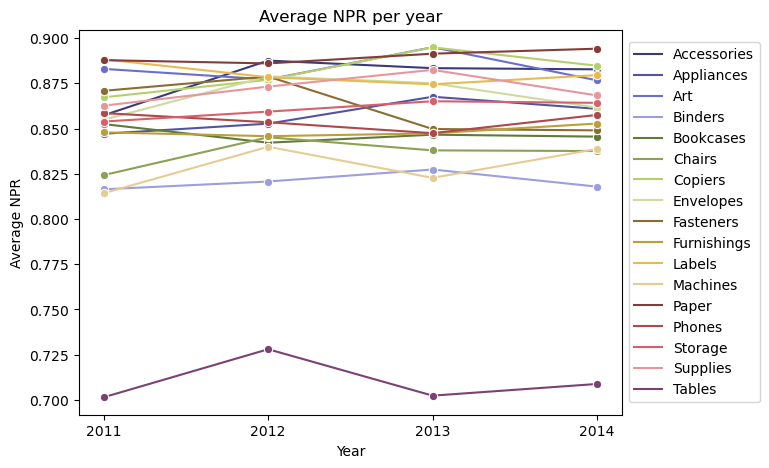

In [79]:
NPR_per_year_subcategory=df_copy_4.groupby(['Year','Sub-Category'])['NPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=NPR_per_year_subcategory,x='Year',y='NPR',marker='o',hue='Sub-Category',palette='tab20b')
plt.ylabel('Average NPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average NPR per year')
plt.show()

<Axes: xlabel='Segment', ylabel='PPQ'>

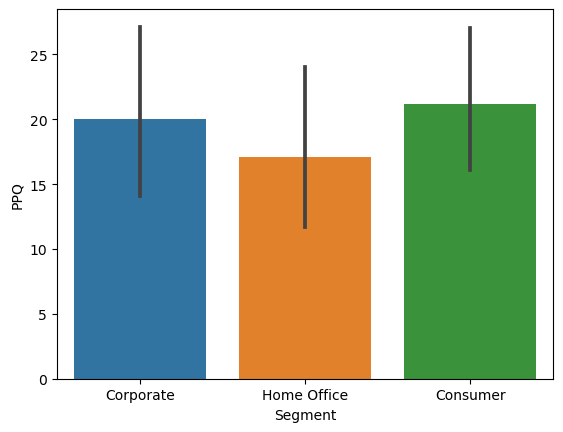

In [83]:
temp=df_copy_3[df_copy_3['Market']=='Canada']
sns.barplot(data=temp,x='Segment',y='PPQ',estimator='mean')

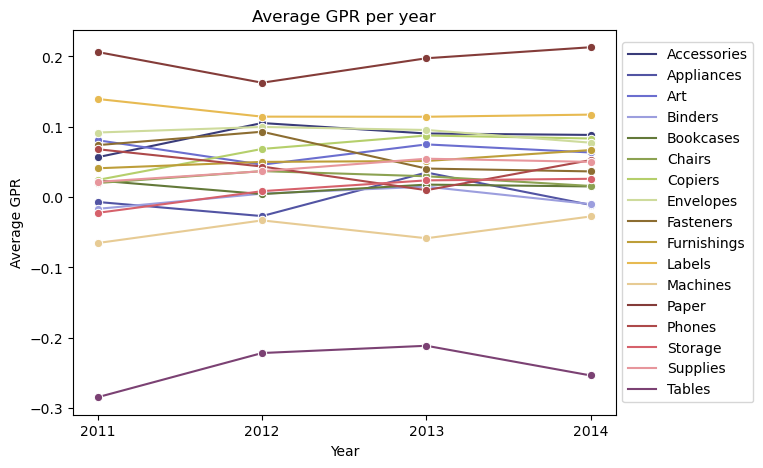

In [84]:
GPR_per_year_subcategory=df_copy_4.groupby(['Year','Sub-Category'])['GPR'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=GPR_per_year_subcategory,x='Year',y='GPR',marker='o',hue='Sub-Category',palette='tab20b')
plt.ylabel('Average GPR')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average GPR per year')
plt.show()

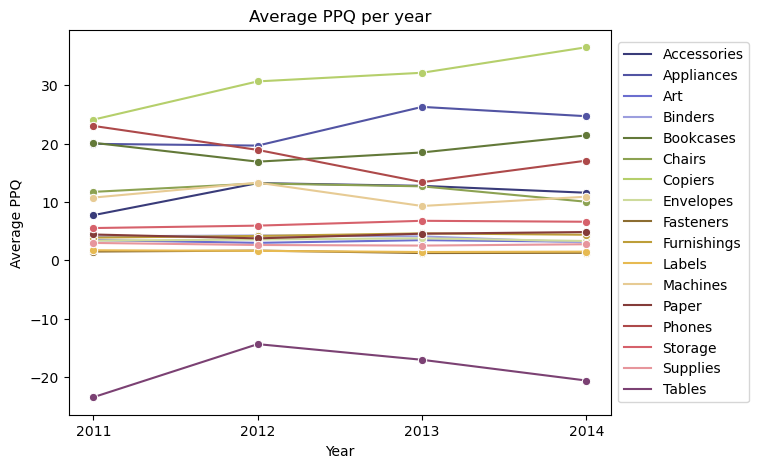

In [85]:
PPQ_per_year_subcategory=df_copy_4.groupby(['Year','Sub-Category'])['PPQ'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.lineplot(data=PPQ_per_year_subcategory,x='Year',y='PPQ',marker='o',hue='Sub-Category',palette='tab20b')
plt.ylabel('Average PPQ')
plt.xticks([2011,2012,2013,2014])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average PPQ per year')
plt.show()